In [79]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.0)

## Bussiness Understanding

1. 10 USD / hour for casual user
2. 3 USD / hour for registred user
3. 14% taxes
4. 2000 USD / year maintainance

In [80]:
df = pd.read_csv('bikes.csv')
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,1/1/2011 0:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,1/1/2011 1:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40
2,1/1/2011 2:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32
3,1/1/2011 3:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13
4,1/1/2011 4:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,12/19/2012 19:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336
10882,12/19/2012 20:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241
10883,12/19/2012 21:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168
10884,12/19/2012 22:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 935.6+ KB


In [82]:
df.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count
count,10030.000000,9388.000000,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000
mean,0.029113,0.678206,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132
std,0.168131,0.467189,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454
min,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,0.000000,1.000000,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0.000000,1.000000,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000
max,1.000000,1.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000


## Data Analysis
### Are there any useful variables that you can engineer with the given data?

#### *1* - in the Feature Engineering add all profit

In [83]:
def calc_profit(work_hour):
    cash_profit = work_hour['casual'] * 10 + work_hour['registered'] * 3
    profit_without_taxes = cash_profit - (0.14 * cash_profit)
    maintainence_per_hour = 2000 / (365*24)
    safy_profit = profit_without_taxes - maintainence_per_hour
    return safy_profit

In [84]:
df['profit'] = df.apply(calc_profit, axis=1)
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
0,1/1/2011 0:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,59.111689
1,1/1/2011 1:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,151.131689
2,1/1/2011 2:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,112.431689
3,1/1/2011 3:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,51.371689
4,1/1/2011 4:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,2.351689
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,12/19/2012 19:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,908.791689
10882,12/19/2012 20:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,681.751689
10883,12/19/2012 21:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,457.291689
10884,12/19/2012 22:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,404.831689


#### what is the max rented bikes count 

In [85]:
df[df['rented_bikes_count']==df['rented_bikes_count'].max()]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
9345,9/12/2012 18:00,Fall,0.0,NaN,Clear,27.06,NaN,16.9979,91,886,977,3068.251689


#### what is the max registered

In [86]:
df[df['registered']==df['registered'].max()]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
9345,9/12/2012 18:00,Fall,0.0,NaN,Clear,27.06,NaN,16.9979,91,886,977,3068.251689


#### what is the max profit

In [87]:
df[df['profit']==df['profit'].max()]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
9415,9/15/2012 16:00,Fall,0.0,0.0,Mist,NaN,36.0,15.0013,350,433,783,4126.911689


In [88]:
df['datetime']

0           1/1/2011 0:00
1           1/1/2011 1:00
2           1/1/2011 2:00
3           1/1/2011 3:00
4           1/1/2011 4:00
               ...       
10881    12/19/2012 19:00
10882    12/19/2012 20:00
10883    12/19/2012 21:00
10884    12/19/2012 22:00
10885    12/19/2012 23:00
Name: datetime, Length: 10886, dtype: object

In [89]:
df[df['profit'] == df['profit'].min()]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
4,1/1/2011 4:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,2.351689
5,1/1/2011 5:00,NaN,0.0,NaN,Mist,9.84,NaN,6.0032,0,1,1,2.351689
30,1/2/2011 7:00,Spring,0.0,0.0,NaN,16.40,NaN,12.9980,0,1,1,2.351689
49,1/3/2011 4:00,Spring,0.0,NaN,Clear,6.56,NaN,26.0027,0,1,1,2.351689
71,1/4/2011 2:00,Spring,0.0,1.0,NaN,5.74,63.0,8.9981,0,1,1,2.351689
...,...,...,...,...,...,...,...,...,...,...,...,...
6884,4/5/2012 4:00,Summer,0.0,1.0,Clear,15.58,43.0,19.0012,0,1,1,2.351689
7051,4/12/2012 4:00,Summer,0.0,1.0,Clear,NaN,61.0,15.0013,0,1,1,2.351689
7433,5/9/2012 2:00,Summer,0.0,1.0,Rainy,NaN,NaN,30.0026,0,1,1,2.351689
10288,11/14/2012 2:00,Winter,0.0,1.0,Clear,9.84,60.0,19.9995,0,1,1,2.351689


#### *2* - in the Feature Engineering add the datetime & year & month & week_day & hour

2012-12-19 23:00:00

In [90]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M', errors='coerce')
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,59.111689
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,151.131689
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,112.431689
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,51.371689
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,2.351689
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,908.791689
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,681.751689
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,457.291689
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,404.831689


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  profit              10886 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 1020.7+ KB


In [92]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['week_day'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,year,month,week_day,hour
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,59.111689,2011,1,Saturday,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,151.131689,2011,1,Saturday,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,112.431689,2011,1,Saturday,2
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,51.371689,2011,1,Saturday,3
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,2.351689,2011,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,908.791689,2012,12,Wednesday,19
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,681.751689,2012,12,Wednesday,20
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,457.291689,2012,12,Wednesday,21
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,404.831689,2012,12,Wednesday,22


#### *3* - in the Feature Engineering add the day period 

In [93]:
def map_hours(x):
    if x in range(0, 13):
        return 'morning'
    elif x in range(13, 19):
        return 'afternoon'
    elif x in range(19, 23):
        return 'evening'
    else:
        return 'night'
    
df['period'] = df['hour'].apply(map_hours)
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,year,month,week_day,hour,period
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,59.111689,2011,1,Saturday,0,morning
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,151.131689,2011,1,Saturday,1,morning
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,112.431689,2011,1,Saturday,2,morning
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,51.371689,2011,1,Saturday,3,morning
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,2.351689,2011,1,Saturday,4,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,908.791689,2012,12,Wednesday,19,evening
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,681.751689,2012,12,Wednesday,20,evening
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,457.291689,2012,12,Wednesday,21,evening
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,404.831689,2012,12,Wednesday,22,evening


In [94]:
df.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,year,month,hour
count,10030.000000,9388.000000,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.029113,0.678206,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132,710.885118,2011.501929,6.521495,11.541613
std,0.168131,0.467189,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454,709.202461,0.500019,3.444373,6.915838
min,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000,2.351689,2011.000000,1.000000,0.000000
25%,0.000000,0.000000,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000,142.531689,2011.000000,4.000000,6.000000
50%,0.000000,1.000000,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000,500.291689,2012.000000,7.000000,12.000000
75%,0.000000,1.000000,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000,1051.551689,2012.000000,10.000000,18.000000
max,1.000000,1.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000,4126.911689,2012.000000,12.000000,23.000000


In [95]:
#### 

In [96]:
df.groupby('period').describe()['profit']

,count,mean,std,min,25%,50%,75%,max
period,,,,,,,,
afternoon,2736.0,1287.588685,814.508255,30.731689,652.511689,1106.591689,1795.451689,4126.911689
evening,1824.0,754.653192,499.534603,15.251689,360.756689,661.111689,1026.826689,2848.091689
morning,5870.0,458.554879,558.407186,2.351689,49.651689,225.951689,696.371689,4095.951689
night,456.0,323.789891,208.882169,15.251689,172.201689,271.101689,452.346689,1043.811689


In [97]:
df.groupby('weather').describe()['profit']

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
Clear,5793.0,766.381153,742.228818,2.351689,158.871689,564.791689,1140.131689,4056.391689
Mist,2259.0,649.365589,634.182907,2.351689,136.511689,471.051689,983.611689,4126.911689
Rainy,693.0,411.097404,507.688309,2.351689,74.591689,226.811689,533.831689,2930.651689
Snowy,1.0,459.011689,NaN,459.011689,459.011689,459.011689,459.011689,459.011689


In [20]:
df.groupby('year').describe()['profit']

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,5422.0,544.870207,539.732932,2.351689,110.066689,384.191689,784.091689,2927.211689
2012,5464.0,875.623926,811.536513,2.351689,196.496689,690.781689,1289.771689,4126.911689


In [21]:
df.corr()[["profit","rented_bikes_count"]]

,profit,rented_bikes_count
holiday,0.014147,-0.005827
workingday,-0.127868,0.010940
temp,0.456096,0.391867
humidity,-0.355108,-0.317282
windspeed,0.100674,0.097747
casual,0.879056,0.690414
registered,0.850715,0.970948
rented_bikes_count,0.951777,1.000000
profit,1.000000,0.951777
year,0.233196,0.260403


<AxesSubplot:>

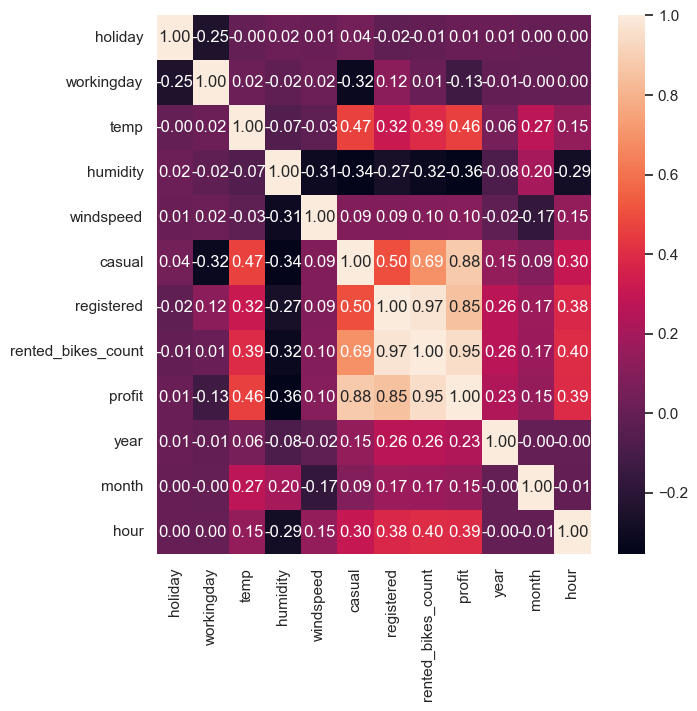

In [22]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [23]:
df["hour"].value_counts()

12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

#### *4* - in the Feature Engineering add the rush hour

In [24]:
def is_rush_hour(hour):
     return 1 if hour in[7,8,9,15,16,17] else 0 

df["rush_hour"]=df["hour"].apply(is_rush_hour)
    

In [25]:
df["rush_hour"].value_counts()

0    8153
1    2733
Name: rush_hour, dtype: int64

In [26]:
df.sample(8)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,year,month,week_day,hour,period,rush_hour
4997,2011-12-02 07:00:00,Winter,0.0,1.0,Clear,NaN,87.0,6.0032,6,199,205,564.791689,2011,12,Friday,7,morning,1
7481,2012-05-11 02:00:00,Summer,0.0,1.0,Clear,NaN,44.0,11.0014,15,16,31,170.051689,2012,5,Friday,2,morning,0
3136,2011-07-19 14:00:00,Fall,0.0,1.0,Clear,35.26,50.0,NaN,41,111,152,638.751689,2011,7,Tuesday,14,afternoon,0
2043,2011-05-12 01:00:00,NaN,0.0,1.0,Clear,18.86,88.0,NaN,1,16,17,49.651689,2011,5,Thursday,1,morning,0
5030,2011-12-03 16:00:00,Winter,0.0,0.0,Clear,15.58,46.0,NaN,75,230,305,1238.171689,2011,12,Saturday,16,afternoon,1
3617,2011-09-01 15:00:00,Fall,0.0,NaN,Clear,29.52,51.0,8.9981,39,135,174,683.471689,2011,9,Thursday,15,afternoon,1
9002,2012-08-17 11:00:00,Fall,0.0,1.0,Clear,31.16,52.0,19.0012,98,205,303,1371.471689,2012,8,Friday,11,morning,0
7490,2012-05-11 11:00:00,Summer,0.0,1.0,Clear,NaN,NaN,16.9979,88,203,291,1280.311689,2012,5,Friday,11,morning,0


In [27]:
df.groupby("rush_hour").describe()["profit"].T

rush_hour,0,1
count,8153.000000,2733.000000
mean,586.833554,1080.951858
std,655.651250,733.703020
min,2.351689,2.351689
25%,87.491689,532.111689
50%,362.691689,951.791689
75%,851.171689,1466.931689
max,4095.951689,4126.911689


In [28]:
df.groupby("rush_hour").describe()["registered"].T

rush_hour,0,1
count,8153.000000,2733.000000
mean,121.253649,257.870472
std,125.270469,173.445231
min,0.000000,1.000000
25%,22.000000,129.000000
50%,91.000000,226.000000
75%,176.000000,344.000000
max,886.000000,857.000000


In [29]:
df.groupby("rush_hour").describe()["casual"].T

rush_hour,0,1
count,8153.000000,2733.000000
mean,31.886913,48.357483
std,46.930353,56.300626
min,0.000000,0.000000
25%,3.000000,12.000000
50%,12.000000,28.000000
75%,43.000000,63.000000
max,362.000000,367.000000


In [30]:
df.groupby("season").describe()["profit"].T

season,Fall,Spring,Summer,Winter
count,2680.000000,2634.000000,2670.000000,2688.000000
mean,919.482645,391.746238,838.469135,684.245306
std,773.488631,464.819898,782.402318,648.632254
min,2.351689,2.351689,2.351689,2.351689
25%,248.311689,73.946689,175.211689,168.331689
50%,772.051689,250.031689,664.551689,533.401689
75%,1365.881689,519.211689,1225.271689,988.771689
max,4126.911689,3976.411689,4056.391689,4095.951689


In [31]:
df.groupby("workingday").describe()["profit"].T

workingday,0.0,1.0
count,3021.000000,6367.000000
mean,842.352775,647.999357
std,869.709340,610.374596
min,2.351689,2.351689
25%,156.291689,133.071689
50%,491.691689,503.731689
75%,1336.211689,981.891689
max,4126.911689,3513.731689


In [32]:
df.groupby("week_day").describe()["profit"].T

week_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,1529.000000,1551.000000,1584.000000,1579.000000,1553.000000,1539.000000,1551.000000
mean,696.841905,670.640445,890.190932,809.787117,653.318528,627.594042,621.452992
std,613.628926,626.448152,929.497164,827.622847,612.017117,602.149032,625.409320
min,2.351689,2.351689,2.351689,2.351689,2.351689,2.351689,2.351689
25%,172.631689,140.381689,161.881689,159.301689,137.371689,120.601689,120.601689
50%,585.431689,520.931689,524.801689,442.671689,519.211689,477.931689,452.991689
75%,1048.111689,1026.181689,1411.676689,1312.991689,982.751689,956.091689,933.731689
max,3272.931689,3165.431689,4126.911689,3697.771689,3096.631689,3513.731689,3072.551689


#### what is tha corrlation (registered & casual) with the( profit & rented bikes count)

In [33]:
df.corr()[['registered','casual']].loc[['profit','rented_bikes_count']]

,registered,casual
profit,0.850715,0.879056
rented_bikes_count,0.970948,0.690414


#### *5* - in the Feature Engineering add the school month

In [34]:
def school_month (month):
     return 1 if month in [8,9,10,11,1,2,3,4,5] else 0


In [35]:
df['is_school_day']=df['month'].apply(school_month)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  profit              10886 non-null  float64       
 12  year                10886 non-null  int64         
 13  month               10886 non-null  int64     

In [37]:
df['is_school_day'].value_counts()

1    8150
0    2736
Name: is_school_day, dtype: int64

In [38]:
df.groupby('is_school_day').describe()['profit'].T

is_school_day,0,1
count,2736.000000,8150.000000
mean,812.646770,676.723169
std,711.323446,705.247943
min,2.351689,2.351689
25%,209.611689,130.491689
50%,659.821689,453.851689
75%,1202.051689,995.651689
max,3598.871689,4126.911689


#### how many for the ( profit & rented bikes count & casual & registered) in the (fall & 2011 & week_day)

In [39]:
df[(df['season'] == 'Fall') & ( df['year']== 2011) & (df['week_day'] == "Saturday")][['profit','rented_bikes_count','casual','registered']].sum()

profit                186086.245936
rented_bikes_count     38354.000000
casual                 14481.000000
registered             23873.000000
dtype: float64

In [40]:
df[(df['season'] == 'Fall') & ( df['year']== 2011) & (df['week_day'] == "Sunday")][['profit','rented_bikes_count','casual','registered']].sum()

profit                176749.629315
rented_bikes_count     36147.000000
casual                 13876.000000
registered             22271.000000
dtype: float64

In [41]:
df[(df['season'] == 'Fall') & ( df['year']== 2011) & (df['week_day'] == "Monday")][['profit','rented_bikes_count','casual','registered']].sum()

profit                160349.969863
rented_bikes_count     39910.000000
casual                  9540.000000
registered             30370.000000
dtype: float64

In [42]:
df[(df['season'] == 'Fall') & ( df['year']== 2011) & (df['week_day'] == "Tuesday")][['profit','rented_bikes_count','casual','registered']].sum()

profit                124548.085936
rented_bikes_count     34900.000000
casual                  5739.000000
registered             29161.000000
dtype: float64

In [43]:
df[(df['season'] == 'Fall') & ( df['year']== 2011) & (df['week_day'] == "Wednesday")][['profit','rented_bikes_count','casual','registered']].sum()

profit                99845.940457
rented_bikes_count    28686.000000
casual                 4298.000000
registered            24388.000000
dtype: float64

In [44]:
df[(df['season'] == 'Fall') & ( df['year']== 2011) & (df['week_day'] == "Thursday")][['profit','rented_bikes_count','casual','registered']].sum()

profit                115123.345936
rented_bikes_count     32682.000000
casual                  5124.000000
registered             27558.000000
dtype: float64

In [45]:
df[(df['season'] == 'Fall') & ( df['year']== 2011) & (df['week_day'] == "Friday")][['profit','rented_bikes_count','casual','registered']].sum()

profit                156314.621553
rented_bikes_count     41657.000000
casual                  8121.000000
registered             33536.000000
dtype: float64

In [46]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'profit', 'year', 'month', 'week_day', 'hour', 'period', 'rush_hour',
       'is_school_day'],
      dtype='object')

In [47]:
df.sample(2)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,year,month,week_day,hour,period,rush_hour,is_school_day
8895,2012-08-13 00:00:00,Fall,0.0,NaN,NaN,27.06,NaN,7.0015,14,33,47,205.311689,2012,8,Monday,0,morning,0,1
2352,2011-06-05 22:00:00,Summer,0.0,0.0,NaN,NaN,78.0,NaN,36,94,130,551.891689,2011,6,Sunday,22,evening,0,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  profit              10886 non-null  float64       
 12  year                10886 non-null  int64         
 13  month               10886 non-null  int64     

## data visualization

#### numerlcal Feature univariate
- 1- temp
- 2- humidity
- 3- windspeed
- 4- casual
- 5- registered
- 6 - rented_bikes_count
- 7 - profit

C:\Users\mo7amed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp'>

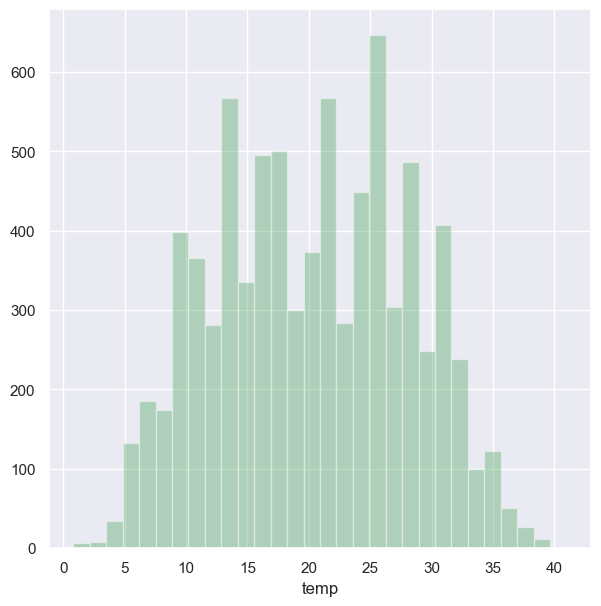

In [49]:
sns.distplot(df["temp"], kde=False, bins=30, color='g')

<AxesSubplot:xlabel='humidity'>

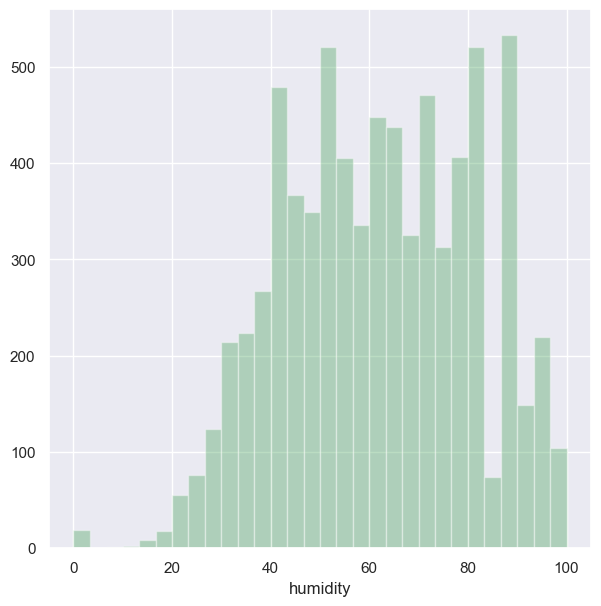

In [50]:
sns.distplot(df["humidity"], kde=False, bins=30, color='g')

<AxesSubplot:xlabel='windspeed'>

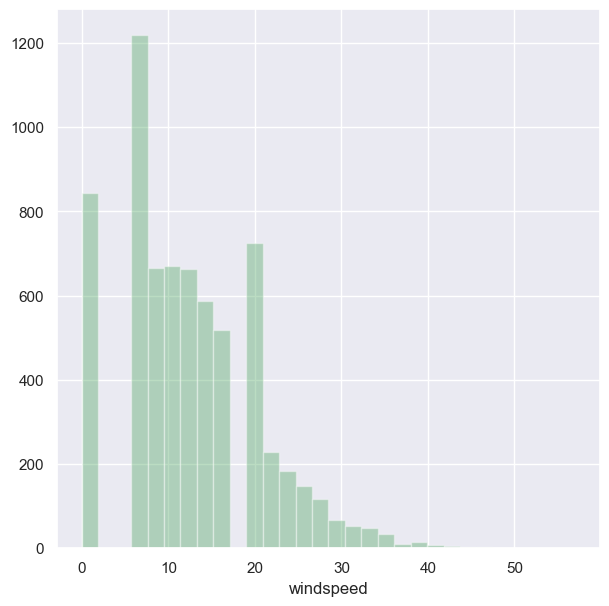

In [51]:
sns.distplot(df["windspeed"], kde=False, bins=30, color='g')

<AxesSubplot:xlabel='casual'>

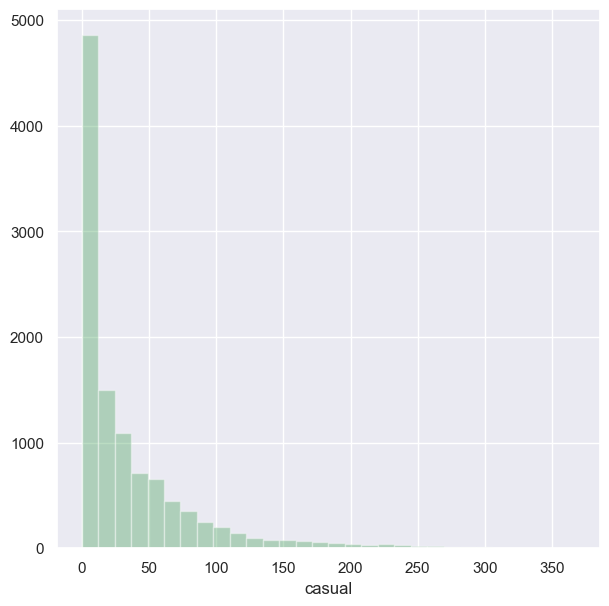

In [52]:
sns.distplot(df["casual"], kde=False, bins=30, color='g')

<AxesSubplot:xlabel='registered'>

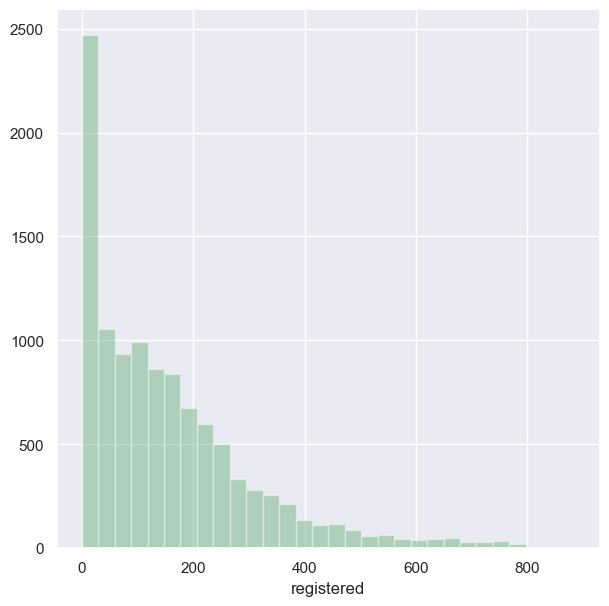

In [53]:
sns.distplot(df["registered"], kde=False, bins=30, color='g')

<AxesSubplot:xlabel='rented_bikes_count'>

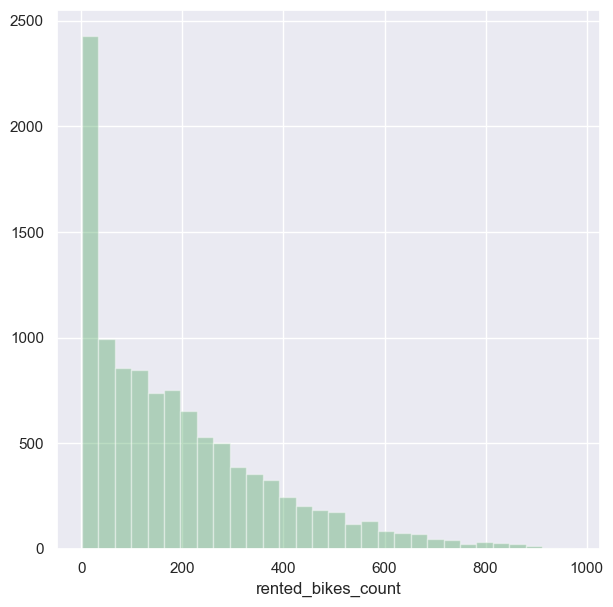

In [54]:
sns.distplot(df["rented_bikes_count"], kde=False, bins=30, color='g')

<AxesSubplot:xlabel='profit'>

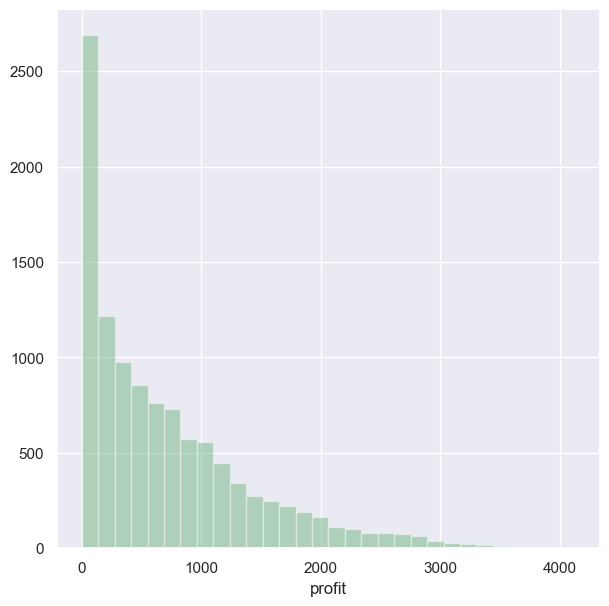

In [55]:
sns.distplot(df["profit"], kde=False, bins=30, color='g')

#### numerlcal Feature Bivariate

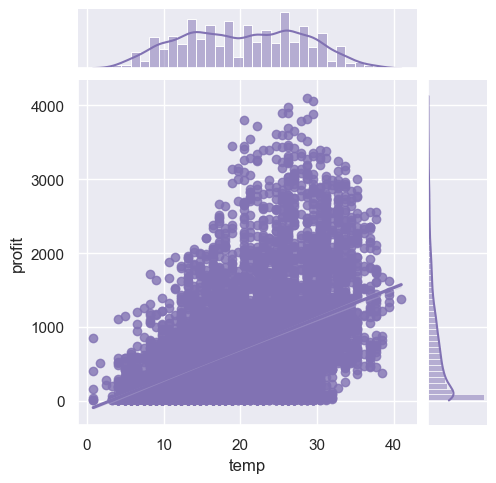

In [56]:
sns.jointplot(x='temp', y='profit', data=df, kind='reg', height=5, color='m')

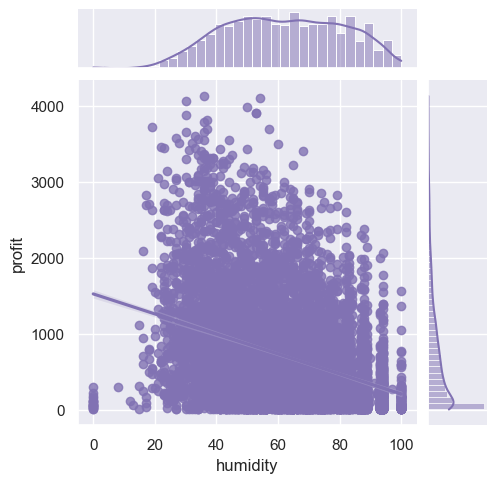

In [57]:
sns.jointplot(x='humidity', y='profit', data=df, kind='reg', height=5, color='m')

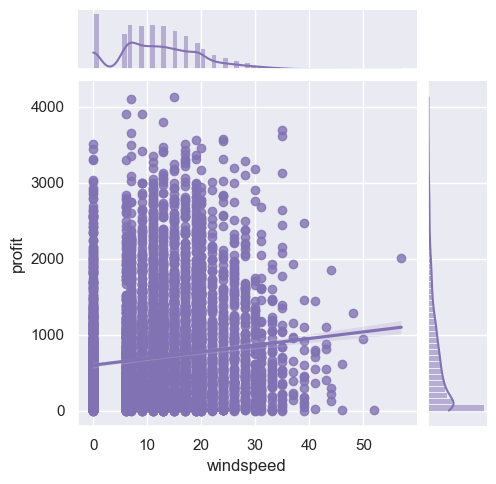

In [58]:
sns.jointplot(x='windspeed', y='profit', data=df, kind='reg', height=5, color='m')

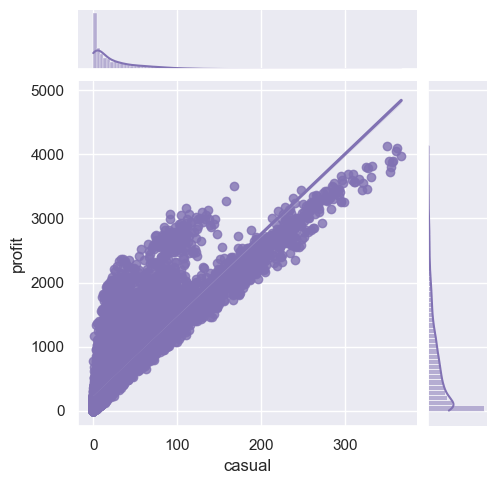

In [59]:
sns.jointplot(x='casual', y='profit', data=df, kind='reg', height=5, color='m')

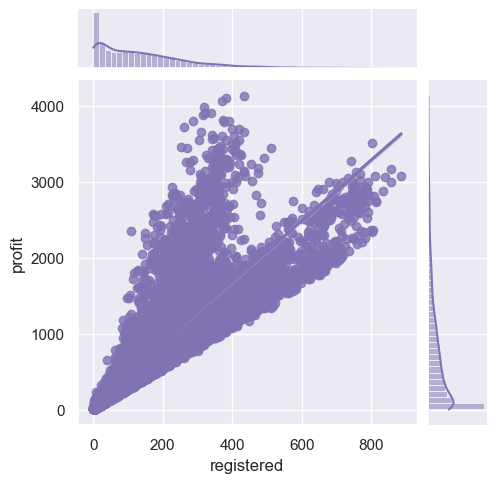

In [60]:
sns.jointplot(x='registered', y='profit', data=df, kind='reg', height=5, color='m')

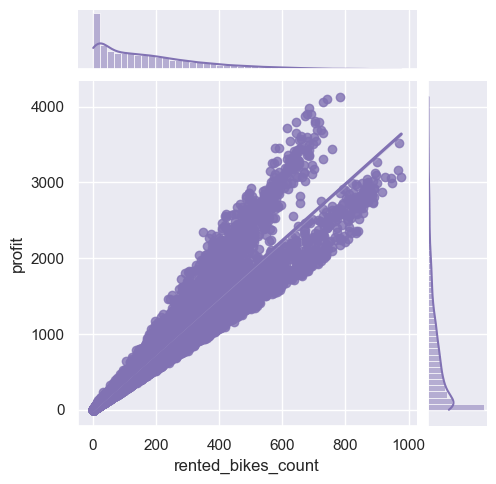

In [61]:
sns.jointplot(x='rented_bikes_count', y='profit', data=df, kind='reg', height=5, color='m')

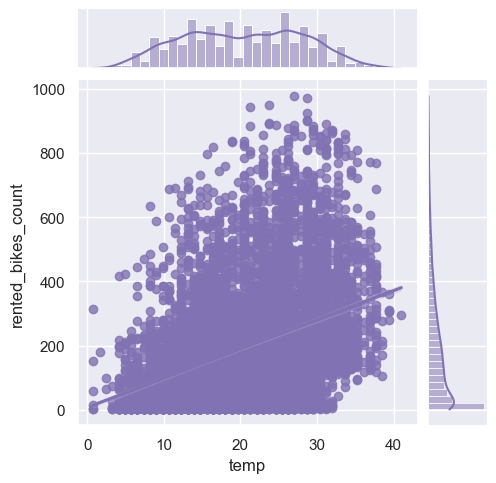

In [62]:
sns.jointplot(x='temp', y='rented_bikes_count', data=df, kind='reg', height=5, color='m')

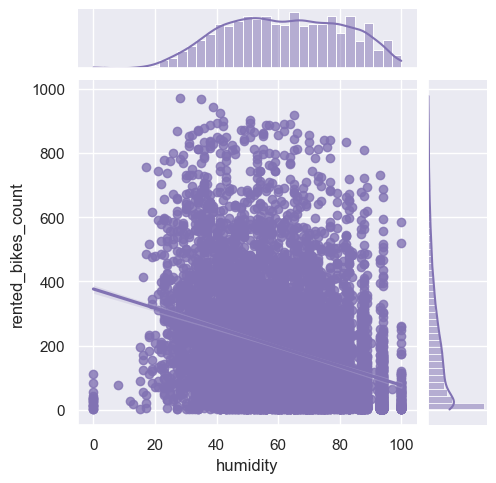

In [63]:
sns.jointplot(x='humidity', y='rented_bikes_count', data=df, kind='reg', height=5, color='m')

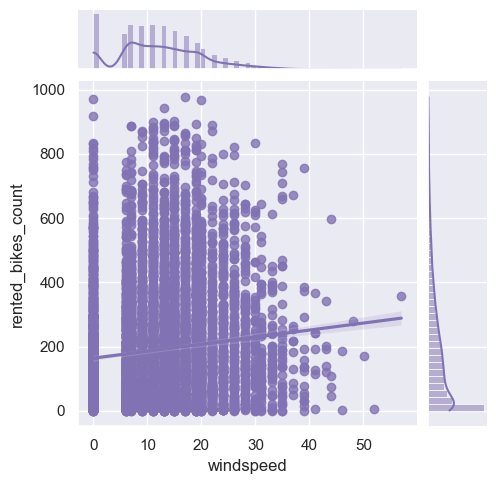

In [64]:
sns.jointplot(x='windspeed', y='rented_bikes_count', data=df, kind='reg', height=5, color='m')

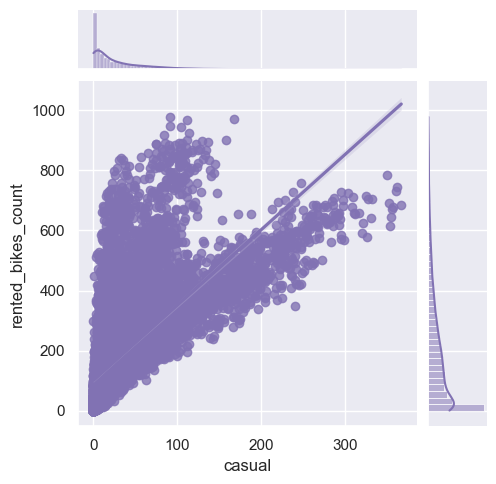

In [65]:
sns.jointplot(x='casual', y='rented_bikes_count', data=df, kind='reg', height=5, color='m')

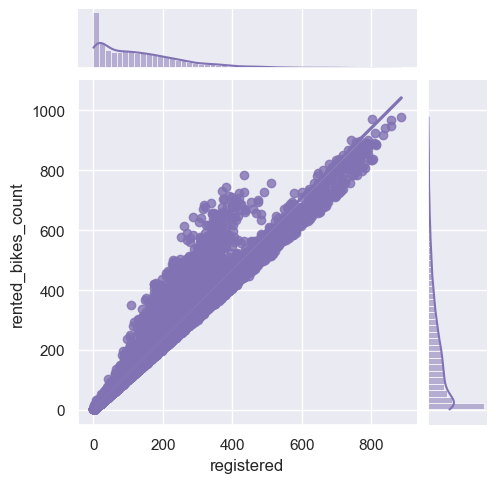

In [66]:
sns.jointplot(x='registered', y='rented_bikes_count', data=df, kind='reg', height=5, color='m')

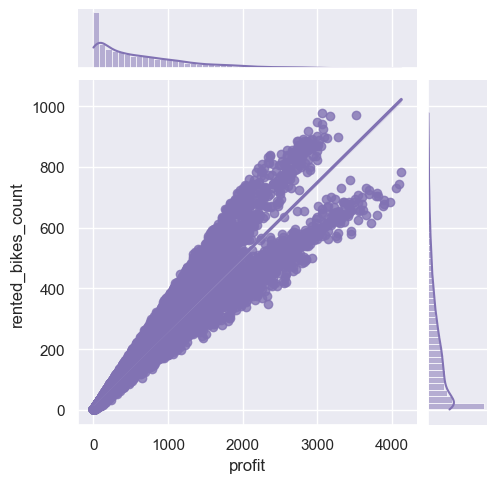

In [67]:
sns.jointplot(x='profit', y='rented_bikes_count', data=df, kind='reg', height=5, color='m')

In [68]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'profit', 'year', 'month', 'week_day', 'hour', 'period', 'rush_hour',
       'is_school_day'],
      dtype='object')

#### Categorical Feature univariate
- 1- season
- 2- holiday
- 3- workingday
- 4- weather
- 5- year
- 6 - month
- 7 - hour
- 8 - period
- 9 - rush_hour
- 10 - is_school_day

<AxesSubplot:xlabel='season', ylabel='count'>

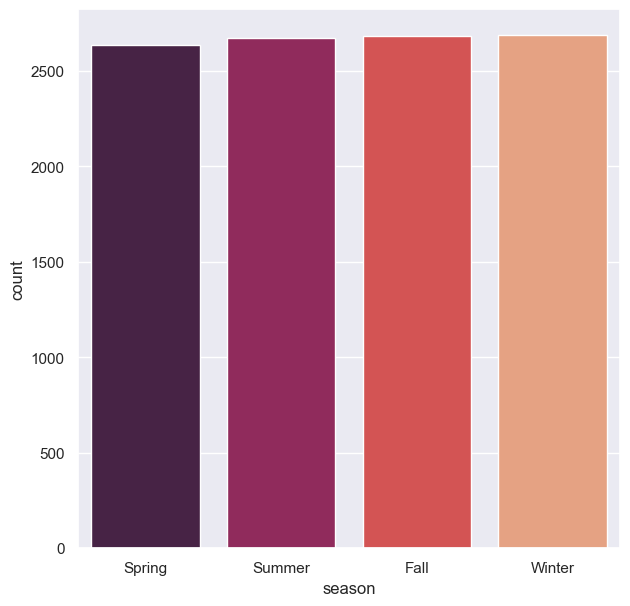

In [69]:
sns.countplot(x='season', data=df, palette='rocket')

<AxesSubplot:xlabel='holiday', ylabel='count'>

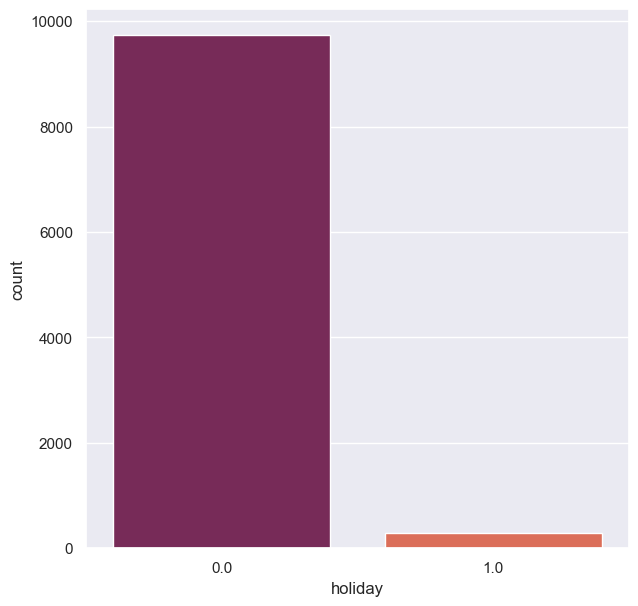

In [70]:
sns.countplot(x='holiday', data=df , palette='rocket')

<AxesSubplot:xlabel='workingday', ylabel='count'>

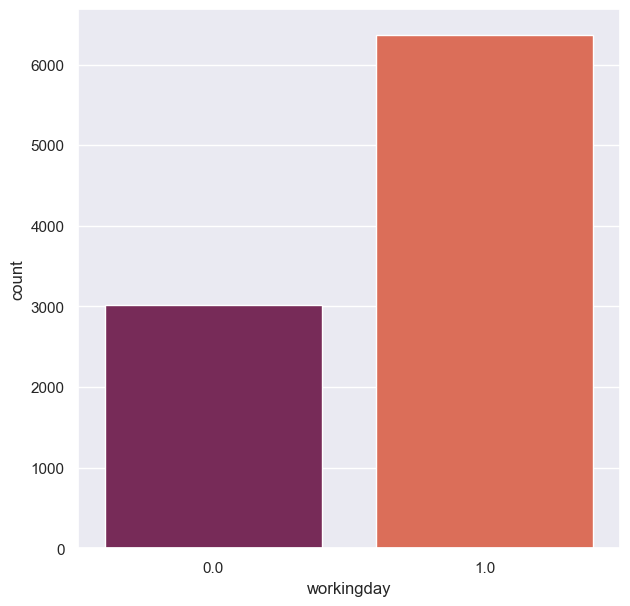

In [71]:
sns.countplot(x='workingday', data=df, palette='rocket')

<AxesSubplot:xlabel='weather', ylabel='count'>

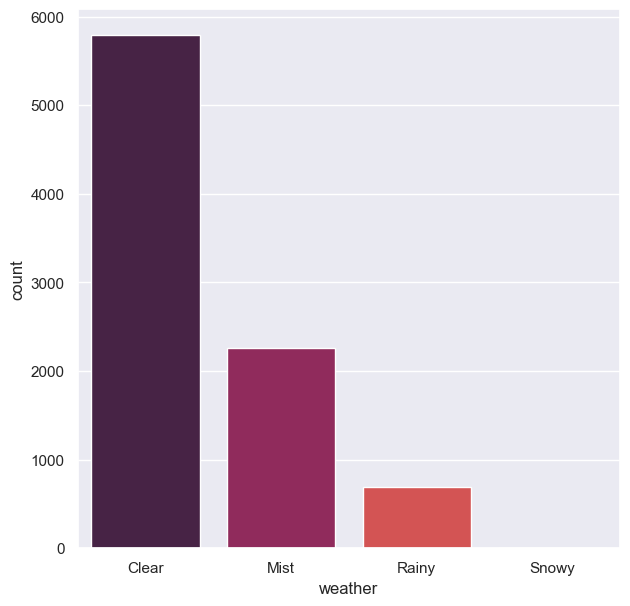

In [72]:
sns.countplot(x='weather', data=df,palette='rocket')

<AxesSubplot:xlabel='year', ylabel='count'>

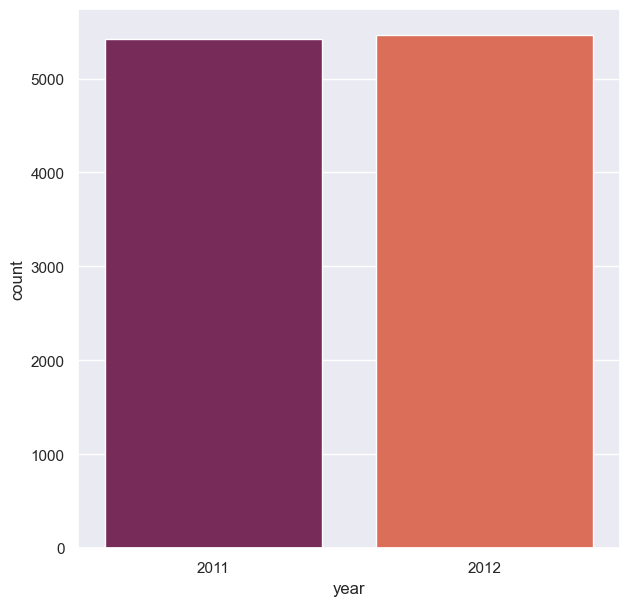

In [73]:
sns.countplot(x='year', data=df ,palette='rocket')

<AxesSubplot:xlabel='month', ylabel='count'>

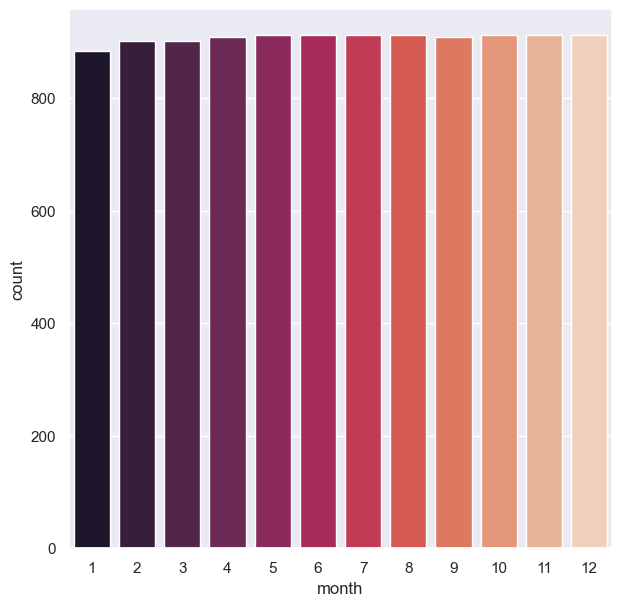

In [74]:
sns.countplot(x='month', data=df, palette='rocket')

<AxesSubplot:xlabel='hour', ylabel='count'>

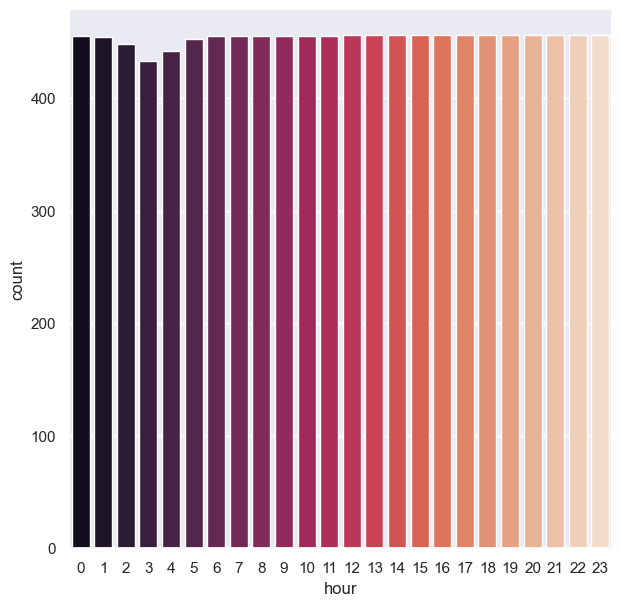

In [75]:
sns.countplot(x='hour', data=df , palette='rocket')

<AxesSubplot:xlabel='period', ylabel='count'>

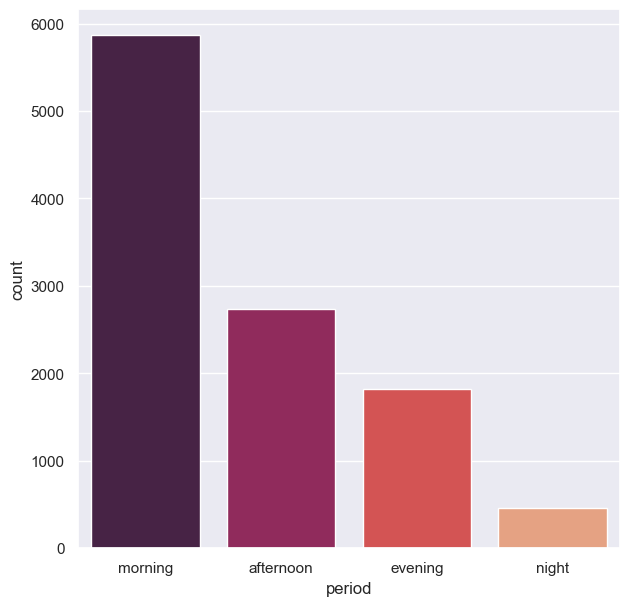

In [76]:
sns.countplot(x='period', data=df , palette='rocket')

<AxesSubplot:xlabel='rush_hour', ylabel='count'>

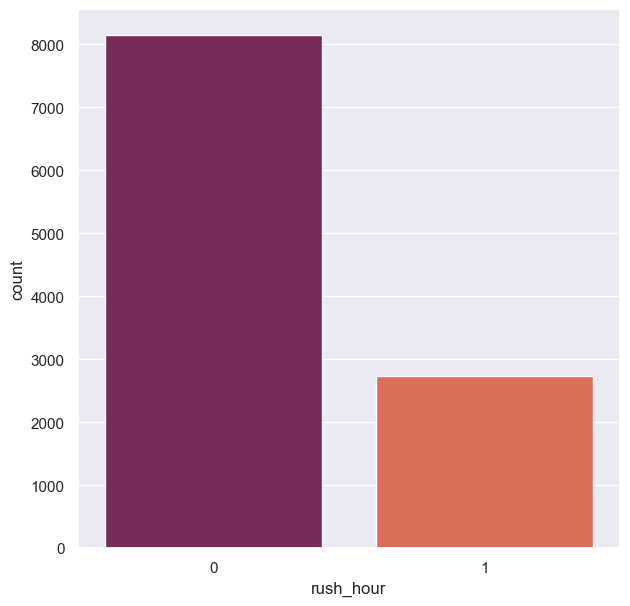

In [77]:
sns.countplot(x='rush_hour', data=df , palette='rocket')

<AxesSubplot:xlabel='is_school_day', ylabel='count'>

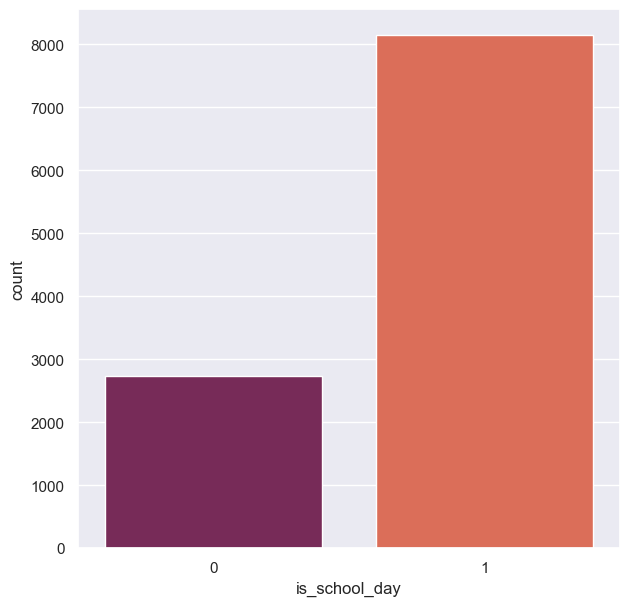

In [78]:
sns.countplot(x='is_school_day', data=df , palette='rocket')

 #### Categorical Feature Bivariate

<AxesSubplot:xlabel='holiday', ylabel='profit'>

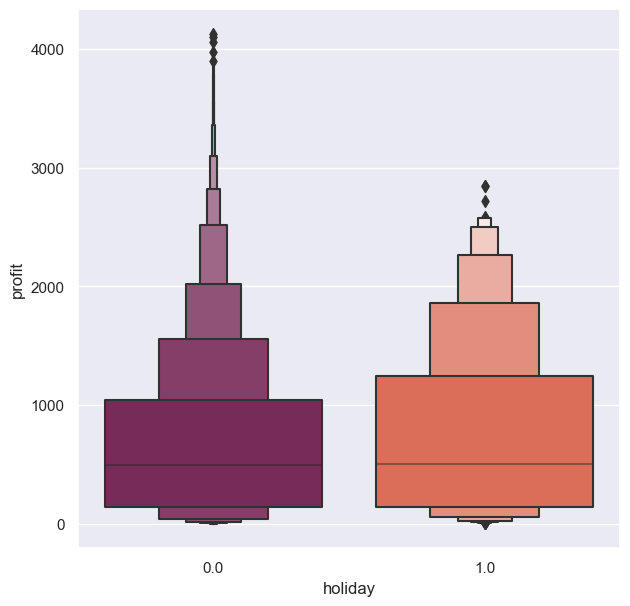

In [79]:
sns.boxenplot(x='holiday', y='profit', data=df, palette='rocket')

<AxesSubplot:xlabel='workingday', ylabel='profit'>

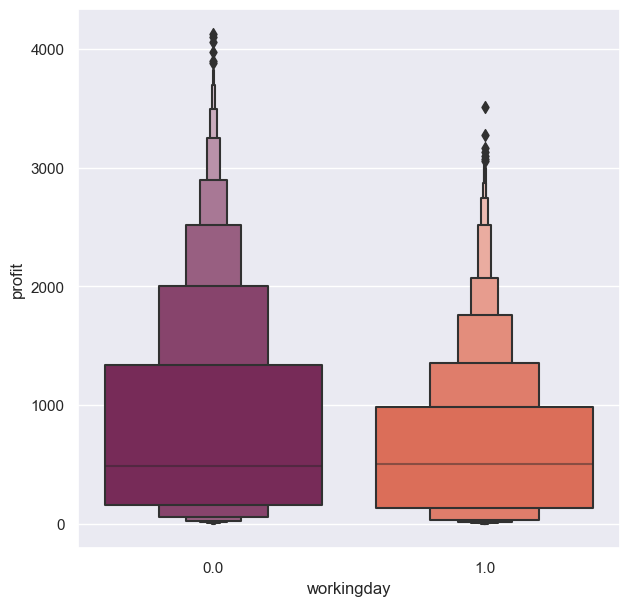

In [80]:
sns.boxenplot(x='workingday', y='profit', data=df, palette='rocket')

<AxesSubplot:xlabel='weather', ylabel='profit'>

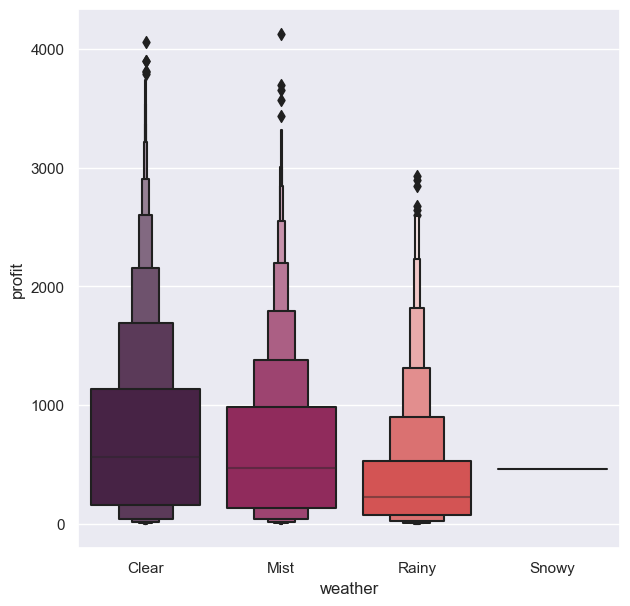

In [81]:
sns.boxenplot(x='weather', y='profit', data=df, palette='rocket')

<AxesSubplot:xlabel='year', ylabel='profit'>

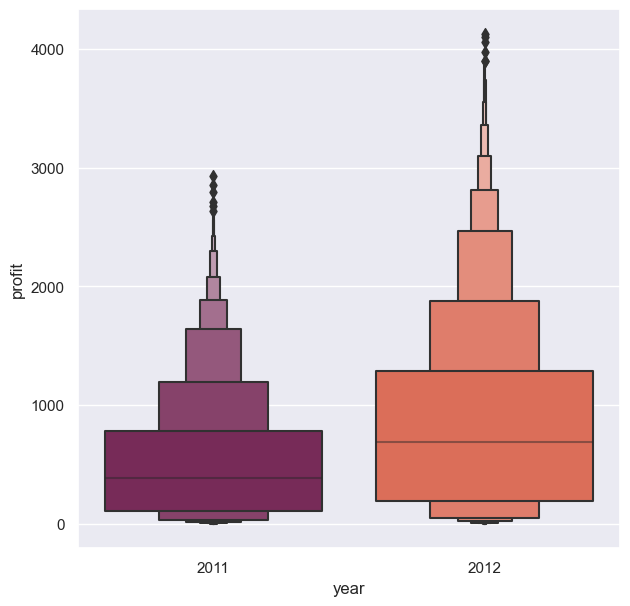

In [82]:
sns.boxenplot(x='year', y='profit', data=df, palette='rocket')

<AxesSubplot:xlabel='month', ylabel='profit'>

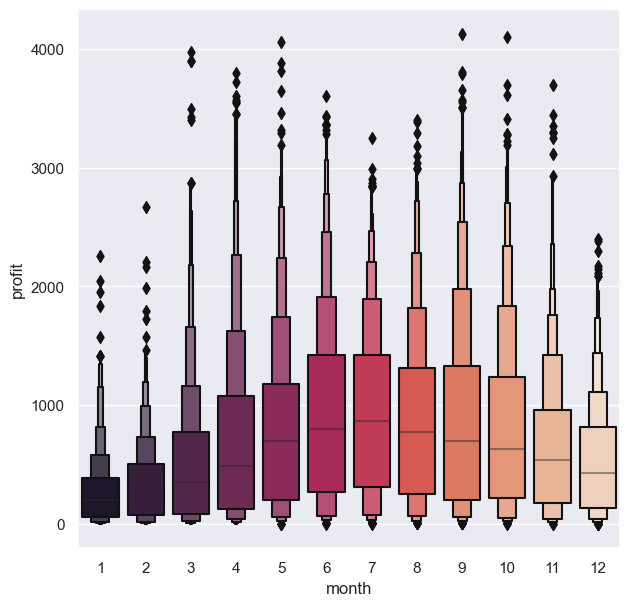

In [83]:
sns.boxenplot(x='month', y='profit', data=df, palette='rocket')

<AxesSubplot:xlabel='hour', ylabel='profit'>

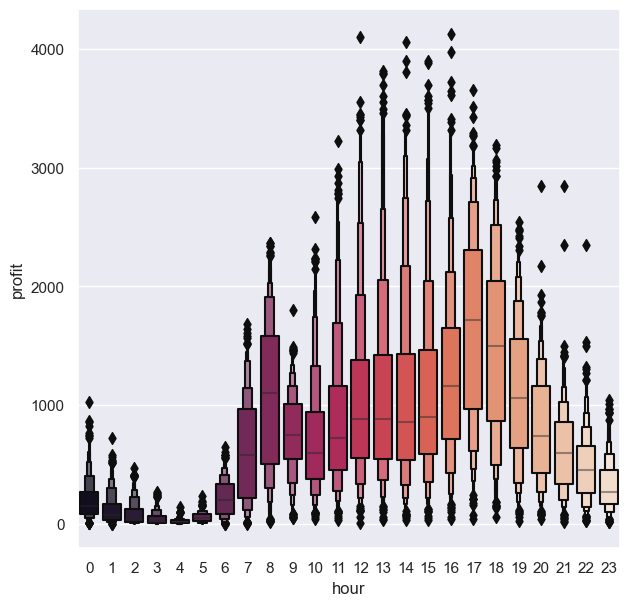

In [84]:
sns.boxenplot(x='hour', y='profit', data=df, palette='rocket')

<AxesSubplot:xlabel='period', ylabel='profit'>

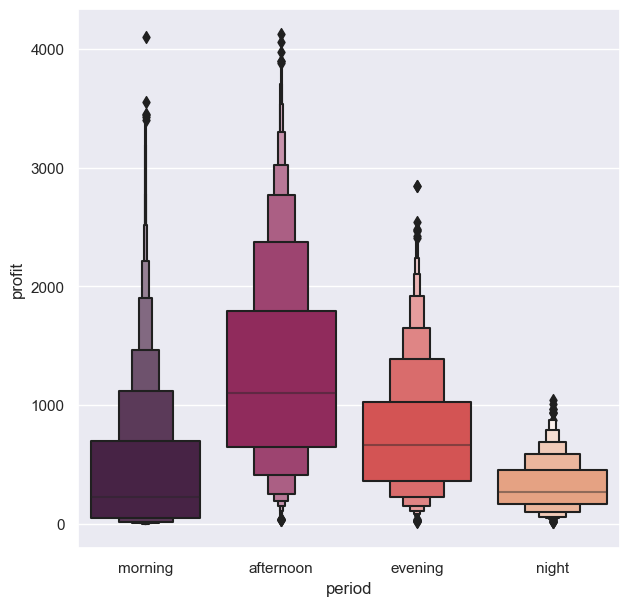

In [85]:
sns.boxenplot(x='period', y='profit', data=df, palette='rocket')

<AxesSubplot:xlabel='rush_hour', ylabel='profit'>

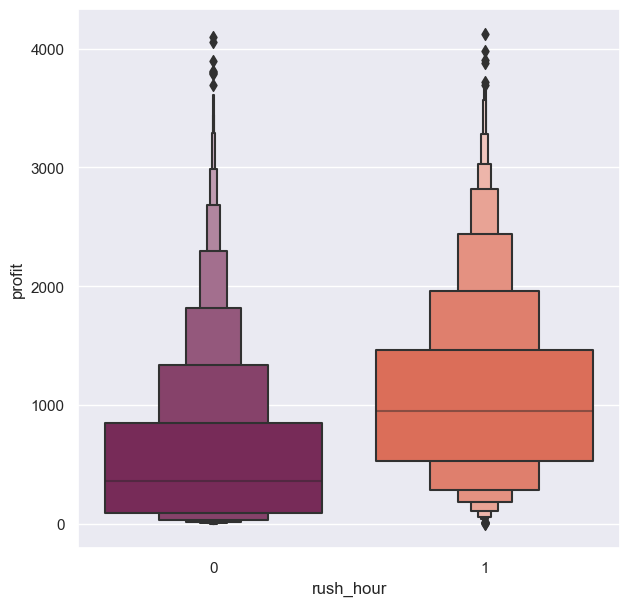

In [86]:
sns.boxenplot(x='rush_hour', y='profit', data=df, palette='rocket')

<AxesSubplot:xlabel='is_school_day', ylabel='profit'>

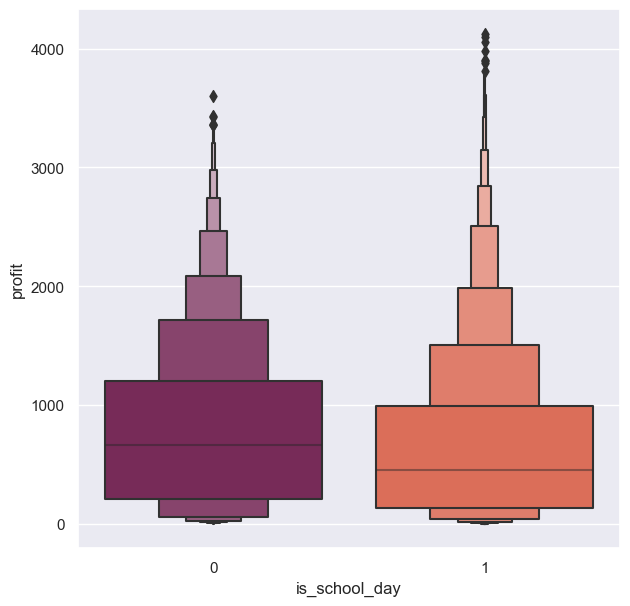

In [87]:
sns.boxenplot(x='is_school_day', y='profit', data=df, palette='rocket')

<AxesSubplot:xlabel='holiday', ylabel='rented_bikes_count'>

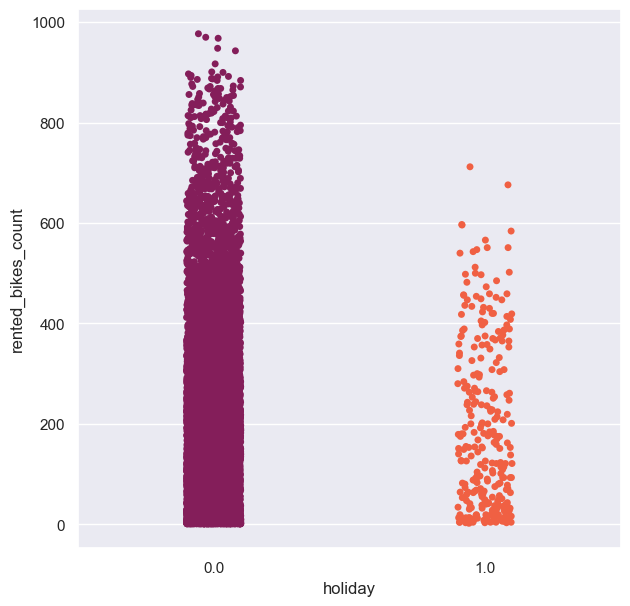

In [88]:
sns.stripplot(x='holiday', y='rented_bikes_count', data=df, palette='rocket')

<AxesSubplot:xlabel='holiday', ylabel='rented_bikes_count'>

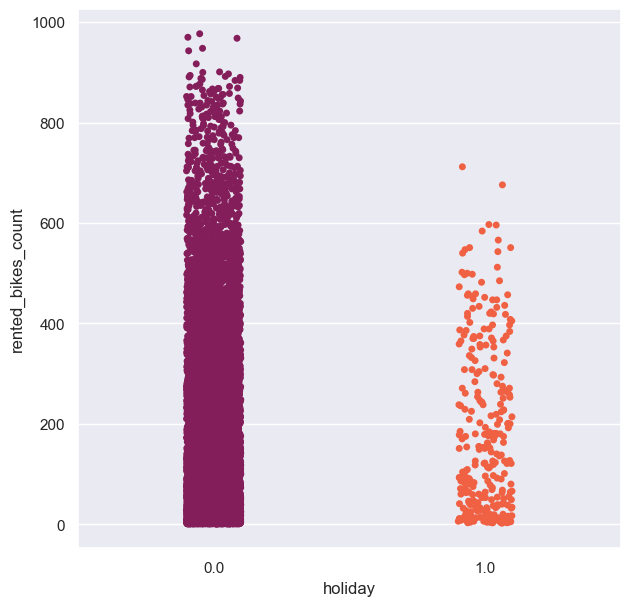

In [89]:
sns.stripplot(x='holiday', y='rented_bikes_count', data=df, palette='rocket')

<AxesSubplot:xlabel='workingday', ylabel='rented_bikes_count'>

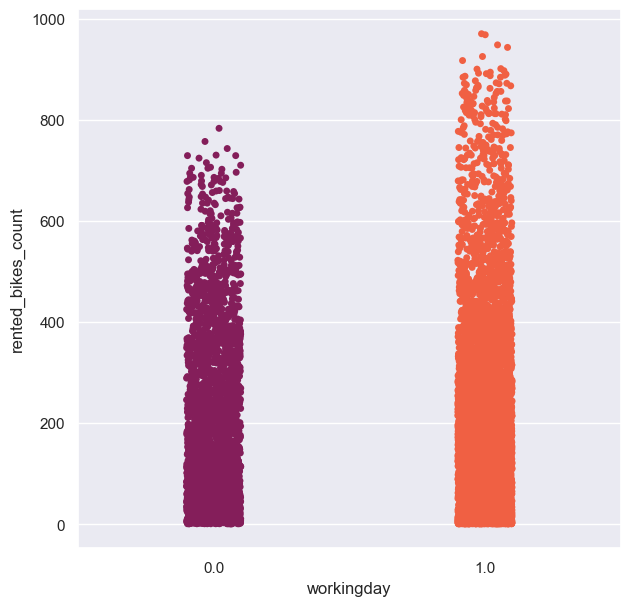

In [90]:
sns.stripplot(x='workingday', y='rented_bikes_count', data=df, palette='rocket')

<AxesSubplot:xlabel='weather', ylabel='rented_bikes_count'>

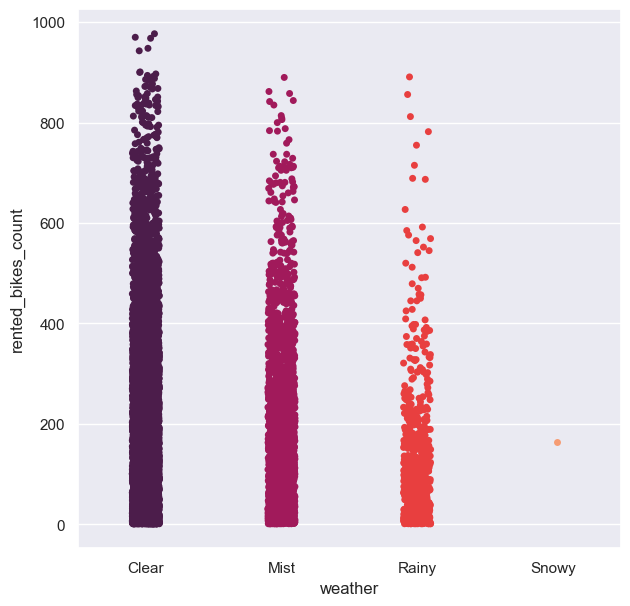

In [91]:
sns.stripplot(x='weather', y='rented_bikes_count', data=df, palette='rocket')

<AxesSubplot:xlabel='year', ylabel='rented_bikes_count'>

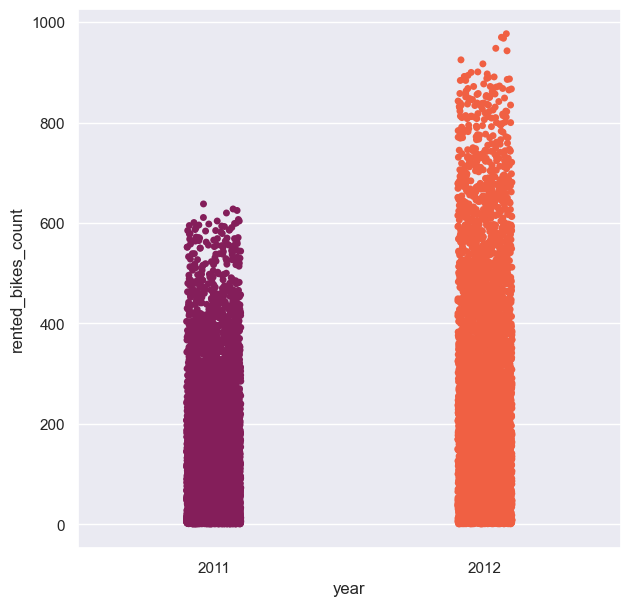

In [92]:
sns.stripplot(x='year', y='rented_bikes_count', data=df, palette='rocket')

<AxesSubplot:xlabel='month', ylabel='rented_bikes_count'>

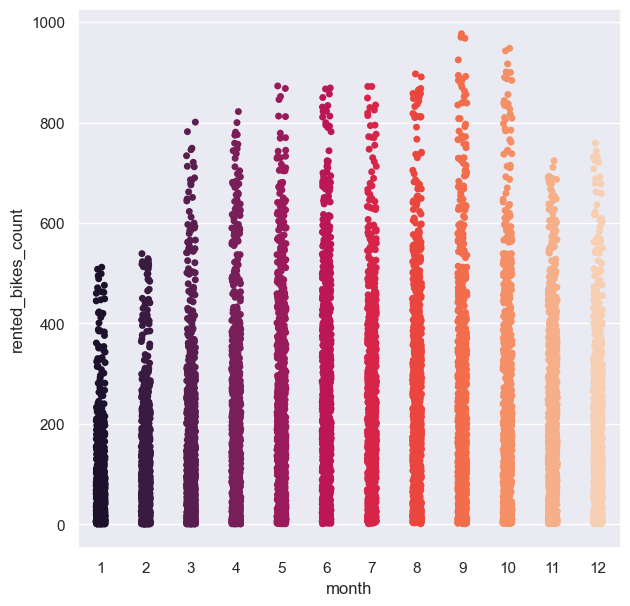

In [93]:
sns.stripplot(x='month', y='rented_bikes_count', data=df, palette='rocket')

<AxesSubplot:xlabel='hour', ylabel='rented_bikes_count'>

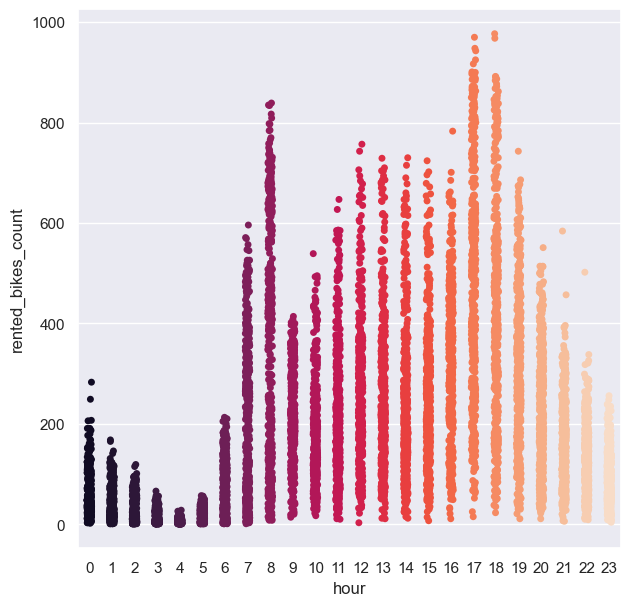

In [94]:
sns.stripplot(x='hour', y='rented_bikes_count', data=df, palette='rocket')

<AxesSubplot:xlabel='period', ylabel='rented_bikes_count'>

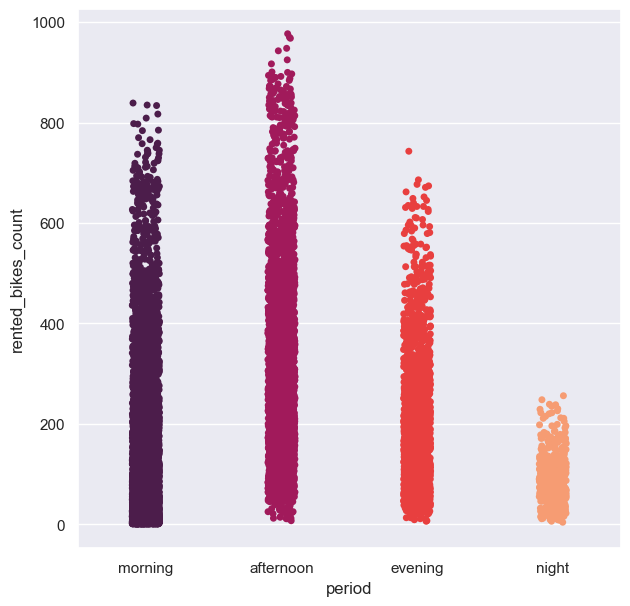

In [95]:
sns.stripplot(x='period', y='rented_bikes_count', data=df, palette='rocket')

<AxesSubplot:xlabel='rush_hour', ylabel='rented_bikes_count'>

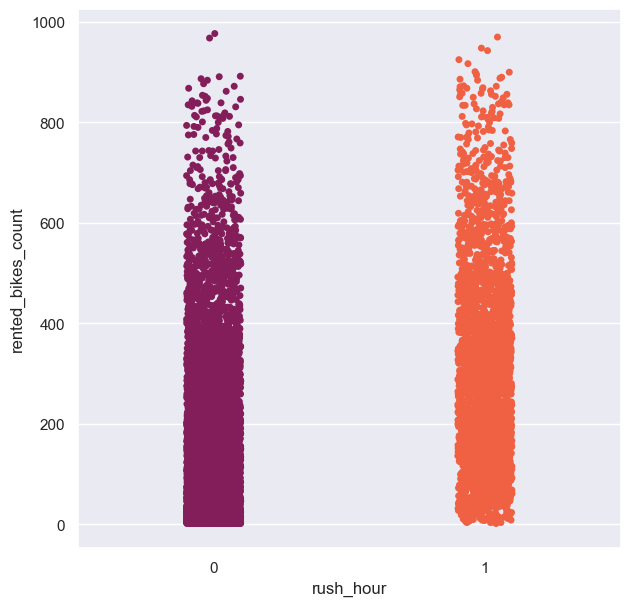

In [96]:
sns.stripplot(x='rush_hour', y='rented_bikes_count', data=df, palette='rocket')

<AxesSubplot:xlabel='is_school_day', ylabel='rented_bikes_count'>

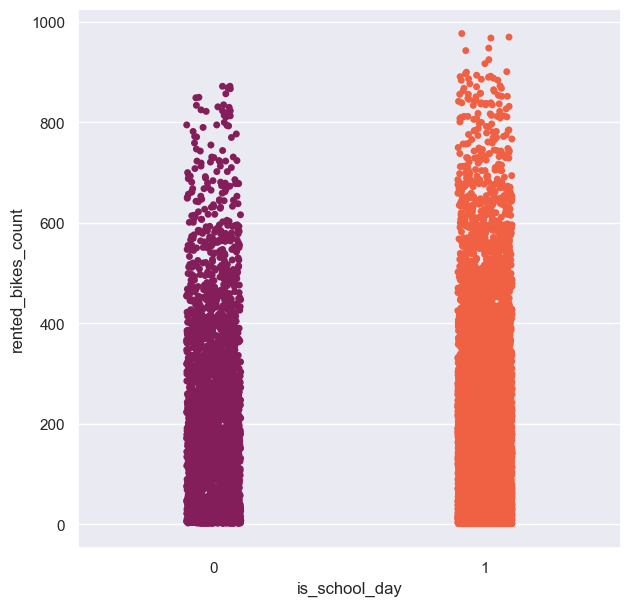

In [97]:
sns.stripplot(x='is_school_day', y='rented_bikes_count', data=df, palette='rocket')

#### Matrix Plots

* Heatmap


In [98]:
new_df=pd.pivot_table(data=df, values ='profit',columns ='month',index ='period')
new_df

month,1,2,3,4,5,6,7,8,9,10,11,12
period,,,,,,,,,,,,
afternoon,500.072918,612.932830,1061.532216,1430.921075,1544.599497,1673.376953,1578.056514,1597.259409,1665.388005,1581.096689,1234.135725,971.692391
evening,260.295111,330.945242,510.928532,723.540900,927.208137,1117.256821,1226.872874,1087.411426,951.186295,801.619847,593.448926,525.124189
morning,197.372376,240.058894,348.320965,457.610468,518.457884,591.404685,595.069260,565.087641,580.371527,543.685929,456.897450,387.100718
night,105.234847,144.025374,187.749584,274.971689,407.479584,478.723795,525.231689,478.565374,399.739584,365.316953,284.069584,234.370637


<AxesSubplot:xlabel='month', ylabel='period'>

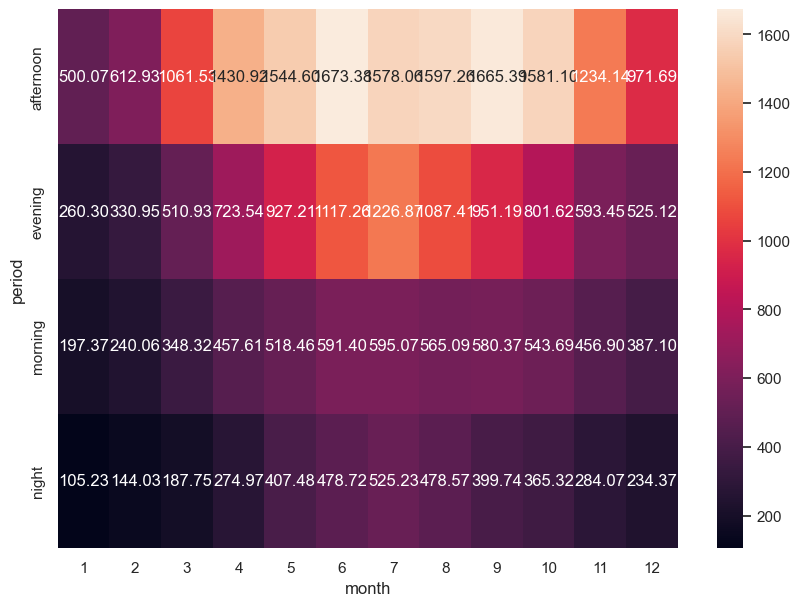

In [99]:
sns.set(rc={'figure.figsize': [10, 7]}, font_scale=1.0)
sns.heatmap(new_df, annot=True, fmt='.2f')

In [100]:
new_df1=pd.pivot_table(data=df, values ='profit',columns ='hour',index ='month')
new_df1.T

month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,72.848446,92.085900,116.414847,146.831689,258.495900,272.799058,349.248532,270.626426,277.257479,241.069584,186.459584,161.700637
1,53.765744,53.974321,82.716426,90.728005,160.682216,171.251163,196.440111,160.682216,169.633311,134.022216,126.350111,115.034321
2,44.013912,41.028446,56.683454,70.563268,107.430111,106.366426,143.165374,102.994321,134.628987,82.150637,78.710637,81.041689
3,34.800151,19.931101,29.561134,39.952801,52.005374,57.006953,63.570111,52.616426,75.567906,43.631689,39.982500,39.286426
4,10.243454,8.032902,17.123454,18.738176,29.238005,30.890111,31.704847,29.373795,31.252216,28.785374,26.906953,20.162742
5,23.971134,25.037095,36.960879,48.882216,62.031163,77.805374,84.594847,78.665374,84.142216,71.853268,59.881163,57.233268
6,95.557095,112.250637,144.161163,191.325374,249.850637,308.149584,305.184847,282.756953,277.370637,272.866953,223.530111,191.687479
7,257.120879,340.535374,442.626426,560.106953,672.766953,834.741163,800.386426,789.478005,750.438532,723.959584,638.208532,563.999584
8,543.965744,707.551689,868.190637,1019.120637,1173.513268,1313.127479,1262.183795,1252.610637,1193.994847,1250.981163,1122.501689,1063.388005


<AxesSubplot:xlabel='hour', ylabel='month'>

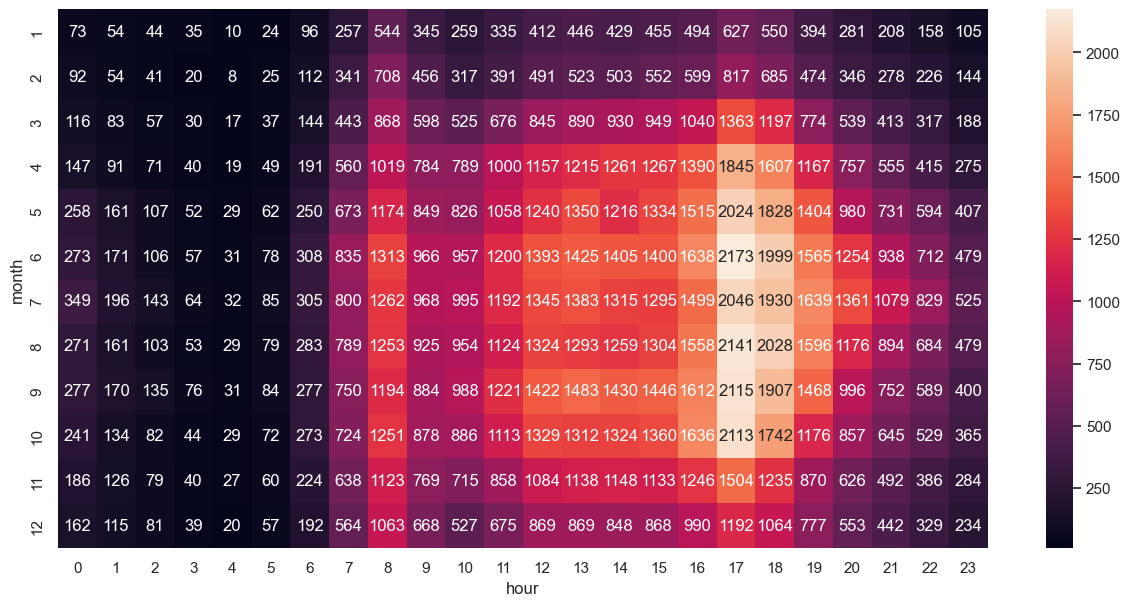

In [101]:
sns.set(rc={'figure.figsize': [15, 7]}, font_scale=1.0)
sns.heatmap(new_df1,annot=True,fmt= '.0f')

In [102]:
new_df2=pd.pivot_table(data=df, values ='casual',columns ='period',index ='hour')
new_df2.T

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
period,,,,,,,,,,,,,,,,,,,,,
afternoon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.589912,76.028509,75.083333,75.440789,61.39693,NaN,NaN,NaN,NaN,NaN
evening,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,49.074561,36.732456,28.567982,22.60307,NaN
morning,10.312088,6.513216,4.819196,2.681293,1.262443,1.455752,4.149451,10.914286,21.542857,30.956044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
night,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.462719


In [103]:
new_df3=pd.pivot_table(data=df, values ='profit',columns ='week_day',index ='month')
new_df3

week_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
1,324.650413,224.225590,320.738023,280.059522,329.852698,275.201926,247.734261
2,411.260342,333.714216,362.942523,313.787320,327.025915,313.897622,342.966197
3,460.083661,542.650334,746.938495,671.902117,494.641126,430.523286,487.868664
4,632.631356,740.655633,824.454356,999.700856,724.493689,639.784884,574.078244
5,913.514523,651.572856,1214.385523,953.927356,825.604606,703.400995,670.290995
6,871.298078,823.408023,1273.873634,1140.358634,794.949189,808.795189,811.031189
7,923.332856,931.271134,1128.177689,998.464606,892.960523,819.184467,925.196189
8,891.591689,816.829023,1156.500356,907.193523,873.770578,849.251023,868.162662
9,837.110689,878.697703,1139.426967,1175.594745,686.846647,729.846647,803.205189


<AxesSubplot:xlabel='week_day', ylabel='month'>

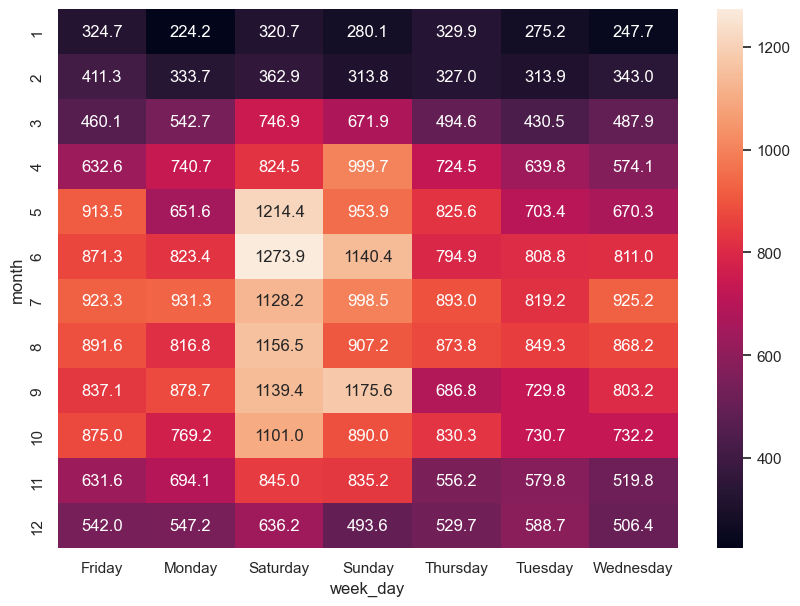

In [104]:
sns.set(rc={'figure.figsize': [10, 7]}, font_scale=1.0)
sns.heatmap(new_df3,annot=True,fmt= '.1f')

In [105]:
new_df4=pd.pivot_table(data=df, values ='casual',columns ='month',index ='period')
new_df4

month,1,2,3,4,5,6,7,8,9,10,11,12
period,,,,,,,,,,,,
afternoon,17.692982,22.793860,63.407895,96.324561,91.377193,103.289474,98.596491,96.083333,103.500000,90.026316,60.293860,33.811404
evening,5.203947,6.611842,20.657895,34.789474,45.842105,60.203947,72.914474,57.651316,46.151316,31.177632,18.144737,11.585526
morning,4.987124,6.086957,14.842650,24.515275,25.562753,30.137652,32.807692,28.807692,29.566191,24.760649,17.184584,10.123482
night,2.710526,4.078947,7.631579,13.842105,22.500000,25.921053,30.973684,25.500000,20.289474,16.184211,9.894737,6.026316


<AxesSubplot:xlabel='month', ylabel='period'>

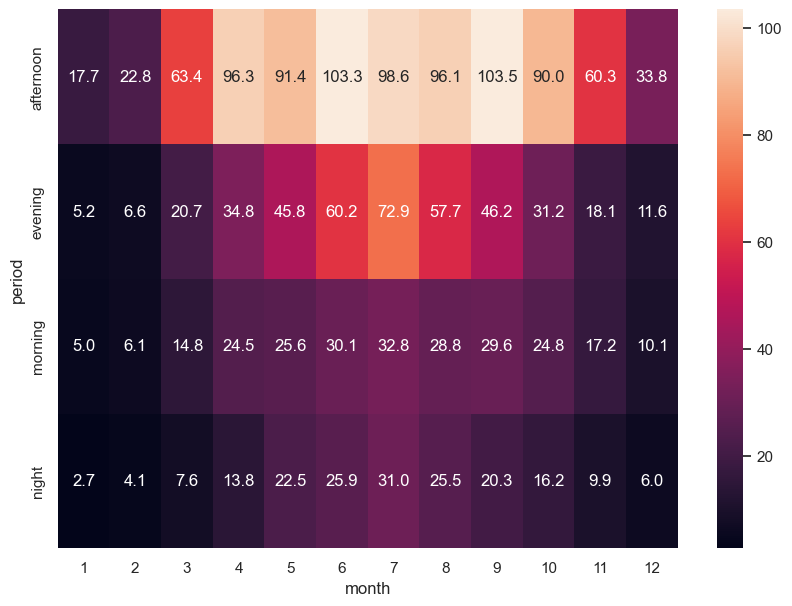

In [106]:
sns.heatmap(new_df4,annot=True,fmt= '.1f')

In [115]:
new_df5=pd.pivot_table(data=df, values ='registered',columns ='month',index ='period')
new_df5

month,1,2,3,4,5,6,7,8,9,10,11,12
period,,,,,,,,,,,,
afternoon,134.938596,161.679825,200.175439,233.627193,294.179825,304.385965,283.083333,298.903509,300.587719,312.828947,277.456140,264.008772
evening,83.631579,106.322368,129.263158,164.565789,206.664474,232.453947,232.572368,229.394737,214.927632,206.868421,169.625000,165.006579
morning,59.965665,72.844720,85.621118,95.739308,115.831984,128.856275,121.376518,123.089069,126.484725,128.283976,119.898580,116.382591
night,31.842105,42.315789,47.421053,60.526316,83.026316,99.236842,100.421053,100.578947,87.394737,87.736842,77.210526,70.842105


<AxesSubplot:xlabel='month', ylabel='period'>

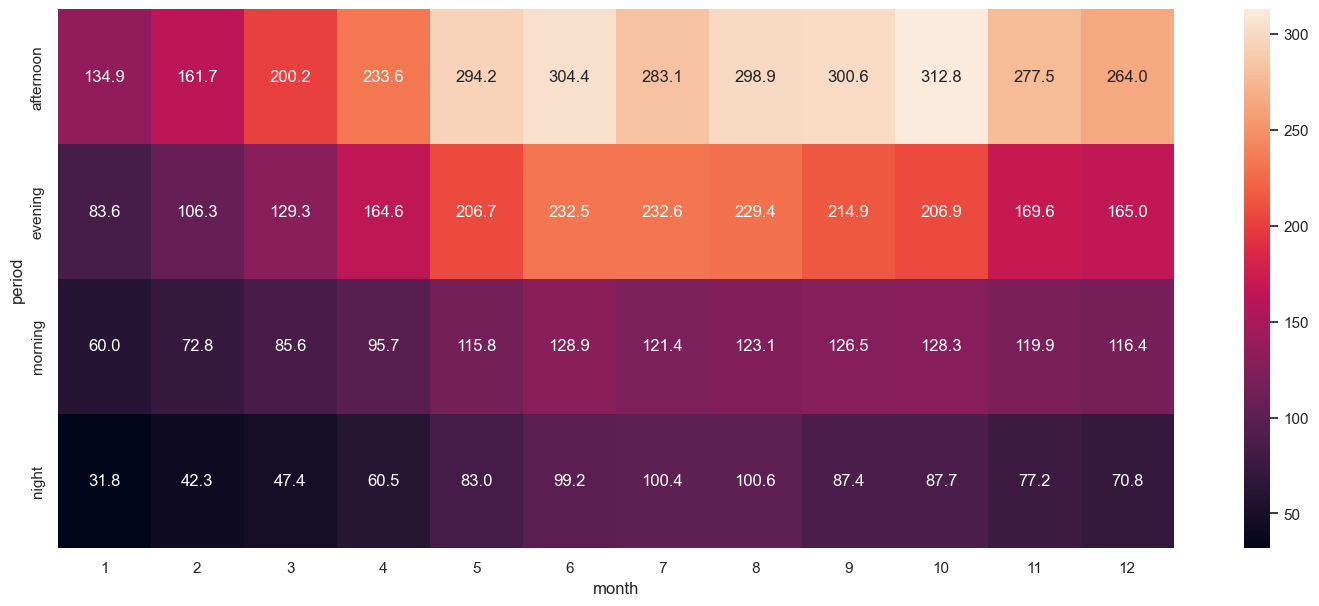

In [116]:
sns.heatmap(new_df5,annot=True,fmt= '.1f')

In [51]:
new_df6=pd.pivot_table(data=df, values ='temp',columns ='year',index ='month')
new_df6.T

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2011,8.740120,11.358338,14.124500,17.735927,21.467362,28.250554,29.966211,29.695877,25.326068,20.822312,16.160621,12.865517
2012,10.874234,12.458246,17.695118,19.704848,23.757222,25.868869,31.864207,29.704558,26.381128,21.127625,14.420355,14.789550


<AxesSubplot:xlabel='year', ylabel='month'>

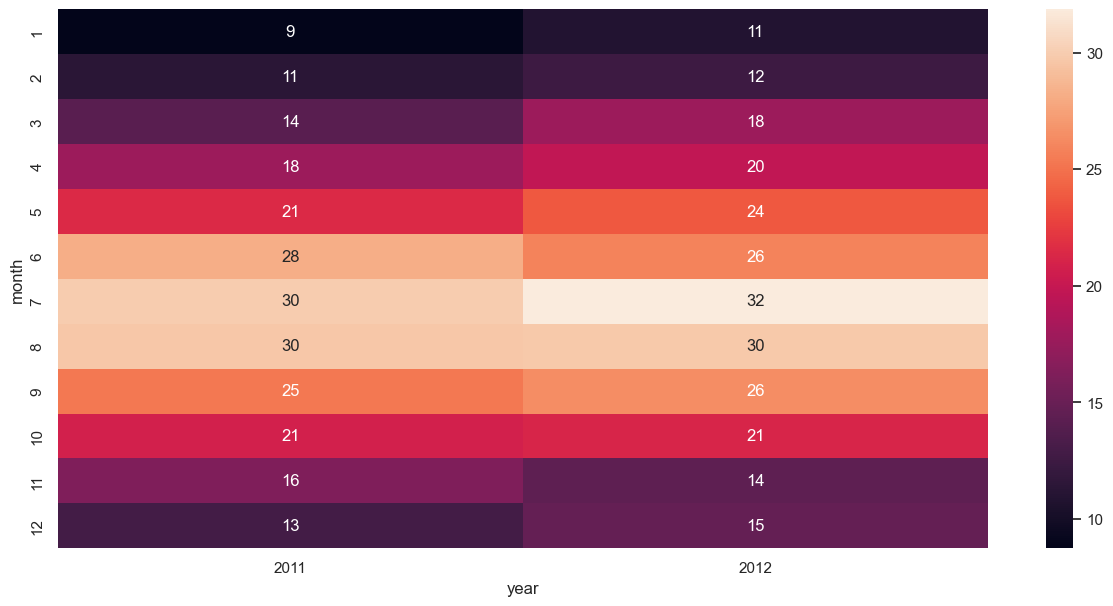

In [52]:
sns.set(rc={'figure.figsize': [15, 7]}, font_scale=1.0)
sns.heatmap(new_df6,annot=True,fmt= '.0f')

## Data Cleansing 

### handle Numerical Variables

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  profit              10886 non-null  float64       
 12  year                10886 non-null  int64         
 13  month               10886 non-null  int64     

In [110]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'profit', 'year', 'month', 'week_day', 'hour', 'period', 'rush_hour',
       'is_school_day'],
      dtype='object')

In [111]:
n_val=['temp','humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count','profit']

In [112]:
for ch in n_val :
    df[ch] = pd.to_numeric(df[ch],errors="coerce")


In [113]:
df.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,year,month,hour,rush_hour,is_school_day
count,10030.000000,9388.000000,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.029113,0.678206,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132,710.885118,2011.501929,6.521495,11.541613,0.251056,0.748668
std,0.168131,0.467189,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454,709.202461,0.500019,3.444373,6.915838,0.433641,0.433799
min,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000,2.351689,2011.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000,142.531689,2011.000000,4.000000,6.000000,0.000000,0.000000
50%,0.000000,1.000000,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000,500.291689,2012.000000,7.000000,12.000000,0.000000,1.000000
75%,0.000000,1.000000,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000,1051.551689,2012.000000,10.000000,18.000000,1.000000,1.000000
max,1.000000,1.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000,4126.911689,2012.000000,12.000000,23.000000,1.000000,1.000000


### handle categorical variables

In [114]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'profit', 'year', 'month', 'week_day', 'hour', 'period', 'rush_hour',
       'is_school_day'],
      dtype='object')

In [115]:
ca_var=['season', 'holiday', 'workingday', 'weather','year', 'month', 'week_day', 'hour', 'period', 'rush_hour','is_school_day']

In [116]:
for ch in ca_var:
    print(f'Column is :{ch} ')
    print (df[ch].unique())
    print('__'*30)

Column is :season 
['Spring' nan 'Summer' 'Fall' 'Winter']
____________________________________________________________
Column is :holiday 
[ 0. nan  1.]
____________________________________________________________
Column is :workingday 
[ 0. nan  1.]
____________________________________________________________
Column is :weather 
['Clear' nan 'Mist' 'Rainy' 'Snowy']
____________________________________________________________
Column is :year 
[2011 2012]
____________________________________________________________
Column is :month 
[ 1  2  3  4  5  6  7  8  9 10 11 12]
____________________________________________________________
Column is :week_day 
['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
____________________________________________________________
Column is :hour 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
____________________________________________________________
Column is :period 
['morning' 'afternoon' 'evening' 'ni

### handle Missing Values

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  profit              10886 non-null  float64       
 12  year                10886 non-null  int64         
 13  month               10886 non-null  int64     

In [118]:
df.isna().sum() / len(df)*100

datetime               0.000000
season                 1.965828
holiday                7.863311
workingday            13.760794
weather               19.658277
temp                  25.555760
humidity              31.453243
windspeed             37.350726
casual                 0.000000
registered             0.000000
rented_bikes_count     0.000000
profit                 0.000000
year                   0.000000
month                  0.000000
week_day               0.000000
hour                   0.000000
period                 0.000000
rush_hour              0.000000
is_school_day          0.000000
dtype: float64

In [119]:
df.drop('windspeed',axis=1,inplace=True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   casual              10886 non-null  int64         
 8   registered          10886 non-null  int64         
 9   rented_bikes_count  10886 non-null  int64         
 10  profit              10886 non-null  float64       
 11  year                10886 non-null  int64         
 12  month               10886 non-null  int64         
 13  week_day            10886 non-null  object    

In [121]:
df.dropna(subset=["season"],inplace=True)

In [122]:
df.isna().sum() / len (df) *100

datetime               0.000000
season                 0.000000
holiday                7.814843
workingday            13.811844
weather               19.612069
temp                  25.599700
humidity              31.549850
casual                 0.000000
registered             0.000000
rented_bikes_count     0.000000
profit                 0.000000
year                   0.000000
month                  0.000000
week_day               0.000000
hour                   0.000000
period                 0.000000
rush_hour              0.000000
is_school_day          0.000000
dtype: float64

In [123]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'casual', 'registered', 'rented_bikes_count', 'profit',
       'year', 'month', 'week_day', 'hour', 'period', 'rush_hour',
       'is_school_day'],
      dtype='object')

In [124]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

In [125]:
nu_ca=['holiday', 'workingday', 'temp','humidity']

In [126]:
for col in nu_ca:
    df[col]=imputer.fit_transform(df[[col]])

In [127]:
df.isna().sum()

datetime                 0
season                   0
holiday                  0
workingday               0
weather               2093
temp                     0
humidity                 0
casual                   0
registered               0
rented_bikes_count       0
profit                   0
year                     0
month                    0
week_day                 0
hour                     0
period                   0
rush_hour                0
is_school_day            0
dtype: int64

In [128]:
from sklearn.impute import SimpleImputer

In [129]:
imputer = SimpleImputer(strategy='most_frequent')

In [130]:
df['weather'] = imputer.fit_transform(df[['weather']])

In [131]:
df.isna().sum()

datetime              0
season                0
holiday               0
workingday            0
weather               0
temp                  0
humidity              0
casual                0
registered            0
rented_bikes_count    0
profit                0
year                  0
month                 0
week_day              0
hour                  0
period                0
rush_hour             0
is_school_day         0
dtype: int64

In [132]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'casual', 'registered', 'rented_bikes_count', 'profit',
       'year', 'month', 'week_day', 'hour', 'period', 'rush_hour',
       'is_school_day'],
      dtype='object')

In [133]:
df=df[['season', 'holiday', 'workingday', 'weather', 'temp','humidity','rented_bikes_count', 'profit', 'month', 'week_day', 'hour','period']]
df

,season,holiday,workingday,weather,temp,humidity,rented_bikes_count,profit,month,week_day,hour,period
0,Spring,0.000000,0.0,Clear,9.840000,81.000000,16,59.111689,1,Saturday,0,morning
1,Spring,0.000000,0.0,Clear,9.020000,80.000000,40,151.131689,1,Saturday,1,morning
2,Spring,0.000000,0.0,Clear,9.020000,61.849829,32,112.431689,1,Saturday,2,morning
3,Spring,0.000000,0.0,Clear,9.840000,75.000000,13,51.371689,1,Saturday,3,morning
6,Spring,0.000000,0.0,Clear,20.299854,61.849829,2,16.971689,1,Saturday,6,morning
...,...,...,...,...,...,...,...,...,...,...,...,...
10880,Winter,0.000000,1.0,Clear,15.580000,61.849829,569,1606.251689,12,Wednesday,18,afternoon
10881,Winter,0.000000,1.0,Clear,15.580000,50.000000,336,908.791689,12,Wednesday,19,evening
10882,Winter,0.000000,1.0,Clear,14.760000,61.849829,241,681.751689,12,Wednesday,20,evening
10884,Winter,0.028868,1.0,Clear,13.940000,61.849829,129,404.831689,12,Wednesday,22,evening


In [134]:
df=pd.get_dummies(df,columns=["season","weather","week_day"] ,drop_first=True)
df

,holiday,workingday,temp,humidity,rented_bikes_count,profit,month,hour,period,season_Spring,...,season_Winter,weather_Mist,weather_Rainy,weather_Snowy,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday
0,0.000000,0.0,9.840000,81.000000,16,59.111689,1,0,morning,1,...,0,0,0,0,0,1,0,0,0,0
1,0.000000,0.0,9.020000,80.000000,40,151.131689,1,1,morning,1,...,0,0,0,0,0,1,0,0,0,0
2,0.000000,0.0,9.020000,61.849829,32,112.431689,1,2,morning,1,...,0,0,0,0,0,1,0,0,0,0
3,0.000000,0.0,9.840000,75.000000,13,51.371689,1,3,morning,1,...,0,0,0,0,0,1,0,0,0,0
6,0.000000,0.0,20.299854,61.849829,2,16.971689,1,6,morning,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,0.000000,1.0,15.580000,61.849829,569,1606.251689,12,18,afternoon,0,...,1,0,0,0,0,0,0,0,0,1
10881,0.000000,1.0,15.580000,50.000000,336,908.791689,12,19,evening,0,...,1,0,0,0,0,0,0,0,0,1
10882,0.000000,1.0,14.760000,61.849829,241,681.751689,12,20,evening,0,...,1,0,0,0,0,0,0,0,0,1
10884,0.028868,1.0,13.940000,61.849829,129,404.831689,12,22,evening,0,...,1,0,0,0,0,0,0,0,0,1


In [135]:
df=pd.get_dummies(df,columns=["period"] ,drop_first=True)
df

,holiday,workingday,temp,humidity,rented_bikes_count,profit,month,hour,season_Spring,season_Summer,...,weather_Snowy,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday,period_evening,period_morning,period_night
0,0.000000,0.0,9.840000,81.000000,16,59.111689,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0.000000,0.0,9.020000,80.000000,40,151.131689,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0.000000,0.0,9.020000,61.849829,32,112.431689,1,2,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0.000000,0.0,9.840000,75.000000,13,51.371689,1,3,1,0,...,0,0,1,0,0,0,0,0,1,0
6,0.000000,0.0,20.299854,61.849829,2,16.971689,1,6,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,0.000000,1.0,15.580000,61.849829,569,1606.251689,12,18,0,0,...,0,0,0,0,0,0,1,0,0,0
10881,0.000000,1.0,15.580000,50.000000,336,908.791689,12,19,0,0,...,0,0,0,0,0,0,1,1,0,0
10882,0.000000,1.0,14.760000,61.849829,241,681.751689,12,20,0,0,...,0,0,0,0,0,0,1,1,0,0
10884,0.028868,1.0,13.940000,61.849829,129,404.831689,12,22,0,0,...,0,0,0,0,0,0,1,1,0,0


### Outliers Handling

In [136]:
df.describe()[['temp','humidity','rented_bikes_count','profit']]

,temp,humidity,rented_bikes_count,profit
count,10672.000000,10672.000000,10672.000000,10672.000000
mean,20.299854,61.849829,191.292541,709.711118
std,6.742300,15.939712,181.138368,709.141299
min,0.820000,0.000000,1.000000,2.351689
25%,16.400000,54.000000,42.000000,141.671689
50%,20.299854,61.849829,144.000000,499.431689
75%,24.600000,70.000000,283.000000,1050.046689
max,41.000000,100.000000,977.000000,4126.911689


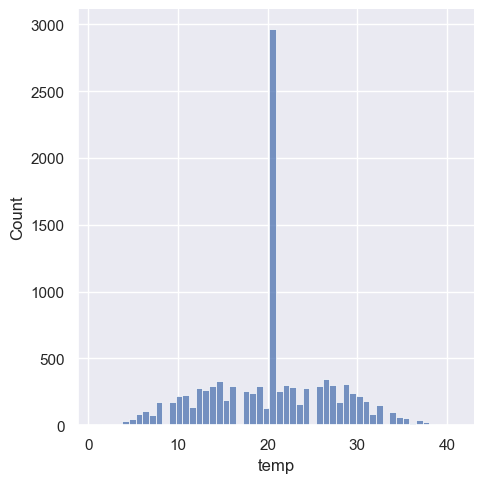

In [137]:
sns.displot(df["temp"], kde=False)

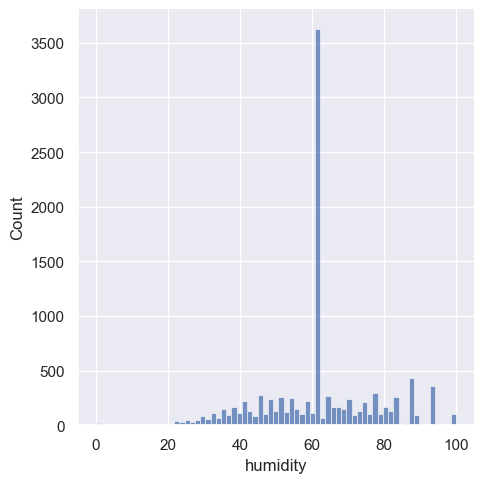

In [138]:
sns.displot(df["humidity"], kde=False)

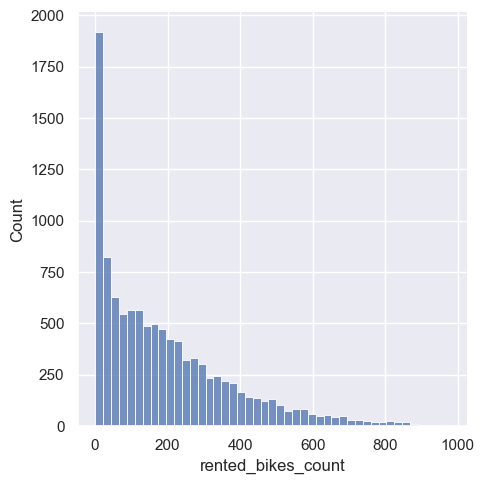

In [139]:
sns.displot(df["rented_bikes_count"], kde=False)

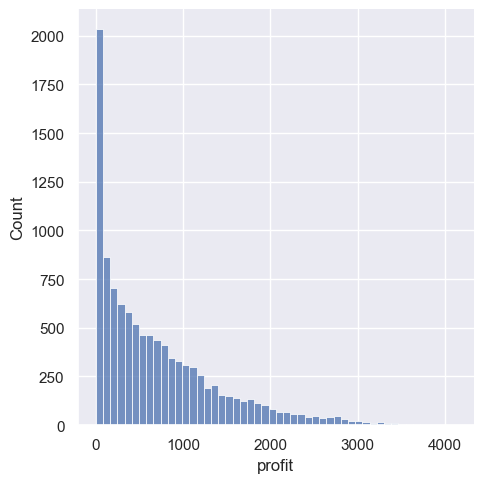

In [140]:
sns.displot(df["profit"], kde=False)

In [141]:
"""import pandas_profiling as pp
pp.ProfileReport(df)"""

'import pandas_profiling as pp\npp.ProfileReport(df)'

In [142]:
x = df.drop('profit', axis=1)
y = df['profit']

In [143]:
x.shape

(10672, 22)

In [144]:
y.shape

(10672,)

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [147]:
x_train.shape

(8537, 22)

In [148]:
y_train.shape

(8537,)

In [149]:
x_test.shape

(2135, 22)

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
scaler = StandardScaler()

In [152]:
scaler.fit(x_train)

StandardScaler()

In [153]:
x_test

,holiday,workingday,temp,humidity,rented_bikes_count,month,hour,season_Spring,season_Summer,season_Winter,...,weather_Snowy,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday,period_evening,period_morning,period_night
6951,0.000000,0.000000,18.860000,23.000000,118,4,23,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2696,0.000000,1.000000,25.420000,61.000000,108,7,6,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6154,0.000000,0.000000,20.299854,34.000000,164,2,16,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2793,0.028868,1.000000,28.700000,65.000000,270,7,7,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1228,0.000000,1.000000,13.120000,87.000000,18,3,23,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6323,0.000000,0.000000,12.300000,61.849829,157,2,17,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9739,0.000000,1.000000,18.860000,88.000000,6,10,4,0,0,1,...,0,0,0,0,0,0,1,0,1,0
8836,0.028868,0.678082,31.160000,61.849829,290,8,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1479,0.000000,1.000000,18.860000,61.849829,153,4,12,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [154]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [155]:
x_train

array([[ 3.86568350e-03,  7.44384613e-01, -4.64578594e-01, ...,
        -4.48941205e-01, -1.08271170e+00, -2.05836689e-01],
       [-1.77727368e-01,  2.02039614e-03, -5.86360054e-01, ...,
        -4.48941205e-01, -1.08271170e+00, -2.05836689e-01],
       [ 3.86568350e-03,  7.44384613e-01, -7.17724946e-03, ...,
        -4.48941205e-01,  9.23606901e-01, -2.05836689e-01],
       ...,
       [-1.77727368e-01,  7.44384613e-01,  2.66110161e-01, ...,
        -4.48941205e-01,  9.23606901e-01, -2.05836689e-01],
       [-1.77727368e-01, -1.56168295e+00, -5.86360054e-01, ...,
        -4.48941205e-01,  9.23606901e-01, -2.05836689e-01],
       [-1.77727368e-01, -1.56168295e+00, -2.04773756e+00, ...,
        -4.48941205e-01, -1.08271170e+00, -2.05836689e-01]])

In [156]:
x_test

array([[-1.77727368e-01, -1.56168295e+00, -2.21015676e-01, ...,
        -4.48941205e-01, -1.08271170e+00,  4.85822040e+00],
       [-1.77727368e-01,  7.44384613e-01,  7.53235998e-01, ...,
        -4.48941205e-01,  9.23606901e-01, -2.05836689e-01],
       [-1.77727368e-01, -1.56168295e+00, -7.17724946e-03, ...,
        -4.48941205e-01, -1.08271170e+00, -2.05836689e-01],
       ...,
       [ 3.86568350e-03,  2.02039614e-03,  1.60570621e+00, ...,
        -4.48941205e-01, -1.08271170e+00, -2.05836689e-01],
       [-1.77727368e-01,  7.44384613e-01, -2.21015676e-01, ...,
        -4.48941205e-01,  9.23606901e-01, -2.05836689e-01],
       [-1.77727368e-01,  7.44384613e-01, -2.21015676e-01, ...,
        -4.48941205e-01,  9.23606901e-01, -2.05836689e-01]])

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [183]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [189]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print(f'MSE Score: {np.sqrt(mean_squared_error(y_test, y_pred))}')  
    print(f'R2 Score: {r2_score(y_test, y_pred)}')  

    print('-'*30)

Using model: LR
Training Score: 0.9378481834425474
Test Score: 0.9382692346322715
MSE Score: 72.8402731568484
R2 Score: 0.9897141097504666
------------------------------
Using model: KNNR
Training Score: 0.9392812810990064
Test Score: 0.8970976543268931
MSE Score: 72.8402731568484
R2 Score: 0.9897141097504666
------------------------------
Using model: SVR
Training Score: 0.3382865627700443
Test Score: 0.3261889726110325
MSE Score: 72.8402731568484
R2 Score: 0.9897141097504666
------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.9760845124145302
MSE Score: 72.8402731568484
R2 Score: 0.9897141097504666
------------------------------
Using model: RF
Training Score: 0.9978995697902573
Test Score: 0.9876110317224918
MSE Score: 72.8402731568484
R2 Score: 0.9897141097504666
------------------------------
Using model: XGBR
Training Score: 0.9976040529777864
Test Score: 0.9897141097504666
MSE Score: 72.8402731568484
R2 Score: 0.9897141097504666
---------------------

In [160]:
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [161]:
x.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'rented_bikes_count',
       'month', 'hour', 'season_Spring', 'season_Summer', 'season_Winter',
       'weather_Mist', 'weather_Rainy', 'weather_Snowy', 'week_day_Monday',
       'week_day_Saturday', 'week_day_Sunday', 'week_day_Thursday',
       'week_day_Tuesday', 'week_day_Wednesday', 'period_evening',
       'period_morning', 'period_night'],
      dtype='object')

In [172]:
data = [1,0,20, 28, 445, 2, 14, 0, 0, 0, 1, 0, 0 , 0, 0, 0, 0, 0, 1, 0, 0,1]

In [173]:
data = scaler.transform([data])
data

C:\Users\mo7amed\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 6.11280939, -1.56168295, -0.05170974, -2.11667704,  1.40653456,
        -1.3068487 ,  0.35788738, -0.57441965, -0.58271563, -0.5727965 ,
         1.95112003, -0.26368816, -0.01082363, -0.41047734, -0.41552958,
        -0.41008763, -0.40891755, -0.40048903,  2.46909409, -0.4489412 ,
        -1.0827117 ,  4.8582204 ]])

In [174]:
model.predict(data)

array([1877.1765], dtype=float32)

In [175]:
model.predict(data)[0]

1877.1765

In [177]:
prediction = model.predict(data)
prediction

array([1877.1765], dtype=float32)

In [178]:
import joblib

In [179]:
joblib.dump(model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')
joblib.dump(x.columns, 'features.h5')

['features.h5']

### Summary 
- The company needs to raise prices on registered customers
- The company needs to target new segmentation in the community as the students 
- the best day of working saturday the day of low thursday
- the best temb betwen [20,30] the bestar [27]
- the best season of working fall
- the best month of working [6,7,9]

- the best time of working afternoon the hour [6,8,9]
- 